# Smart Home Dataset – End-to-end Machine Learning project 

**IoT Course**  &nbsp;&nbsp;&nbsp; **Last modification:** 03/12/2021

**Name:** 

## Content

* <a href="#Section1">Section 1: Exploratory data analysis</a>

> * 1. <a href="#1.">Setup - Library import</a> 
    * 1.1. <a href="#LibInf">Library information</a> 
> * 2. <a href="#2.">Data collection</a> 
    * 2.1 <a href="#2.2">Accessing Google Drive by mounting it locally</a> 
> * 3. <a href="#3.">Discovering and visualizing the data to gain insight</a> 
    * 3.1 <a href="#3.1">Preprocessing</a> 
        * 3.1.1 <a href="#3.1.1">Data exploration</a>
            * Quick Look at the Data Structure
            * How many and what type of attributes do we have?
            * Finding out the categories within the object-type data 
            * Summary of each nummerical attribute
            * Histogram for each numerical attribute
        * 3.1.2 <a href="#3.1.2">Data cleansing</a>
            * Searching for NaNs
        * 3.1.3 <a href="#3.1.3">Feature engineering</a>
            * Working with Time Series
            * Looking for correlation
        * 3.1.4 <a href="#3.1.4">Visualization / Outputs</a>
> * 4. <a href="#4.">Exercise 1: Exploratory data analysis</a> 
        * 4.1 <a href="#4.1">Visualise consumption by season of the year</a> 
        * 4.1.1 <a href="#4.1.1">In which month within each season is the most energy consumed? </a> 
        * 4.1.2 <a href="#4.1.2">Which appliances consume the most energy within that period?</a> 
        * 4.1.3 <a href="#4.1.3">Is there any relationship between weather conditions and the highest energy consumption in those peak periods?</a> 
        * 4.1.4 <a href="#4.1.4">In which weather conditions was the most energy consumed?</a> 
        
* <a href="#Section2">Section 2: Machine Learning and Deep Learning models</a>

> * 5. <a href="#5.">Data analysis - Different approaches</a> 
    * 5.1 <a href="#5.1">Non machine learning approach</a> 
        * Moving Average
        * Anomaly detection
    * 5.2 <a href="#5.2">Machine learning approach</a> 
        * 5.2.1 <a href="#5.2.1">Simple ML Algorithm implementation using Scikit-Learn</a> 
            * Data preparation 
            * Linear Regression
            * Random Forest Regressor
        * 5.2.2 <a href="#5.2.2">Evaluation of an ML algorithm (Regression)</a> 
        * 5.2.3 <a href="#5.2.3">Evaluation of an ML algorithm using Cross-Validation</a> 
        * 5.2.4 <a href="#5.2.4">Fine tune the ML model</a> 
    * 5.3 <a href="#5.3">Deep learning (DL) approach</a> 
        * 5.3.1 <a href="#5.3.1">Time-Series prediction with Long Short Term Memory (LSTM)</a> 
            * Data preparation
            * Definiton of the DL model architecture: Construction of the neural network
            * Compilation of the DL model
            * Training of the DL model: Fit model on training data
            * Evaluation of the DL model
> * 6. <a href="#6">Exercise 2: Building a deep learning model (neural network) with keras</a> 
        * 6.1 <a href="#6.1">Following the steps in section 5, visit the Keras API and select an architecture for your neural network (e.g. a CNN). Build, train and validate your model. </a>  

This notebook uses some of the most important libraries that currently exist in the world of data analysis and Machine Learning (ML). We will work with a dataset on the subject of Internet of Things. The dataset includes information collected by different sensors in different climatic conditions. To show all the possibilities offered by the aforementioned libraries, all the stages that a machine learning project usually has, will be covered. That is to say, data import, data processing and exploration, ML / DL algorithm training and algorithm validation.

In this notebook two differentiated parts are distinguished. The first part deals with exploring the dataset to discover its main characteristics. The second part is related to the training and validation of machine learning models using two of the most used libraries (Scikit-Learn and Keras). First, examples are shown to show what can be done with these libraries. In this way, such practical examples serve as an aid to carry out the exercises at the end of each section.


# Section 1: Exploratory data analysis<a name="Section1"> </a>

## 1. Setup - Libraries import <a name="1."> </a>

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

### WSL Requirements

If working on WSL make sure to install the following packages:

```
pip3 install -U scikit-learn scipy matplotlib
```

Also make sure the right Kernel is selected in Jupyter Notebook (Kernel > Change Kernel > Python 3)
If the notebook is located on a Windows drive and you are working over a mnt folder, make sure that the required packages are installed under Windows and not under WSL as the notebook is then running under Windows.

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

In [4]:
#Estimators
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [15]:
# Common imports
import numpy as np
import os
import pandas as pd

In [5]:
# Working with dates
from datetime import datetime
import time 

In [7]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

In [12]:
# libraries for Deep Learning
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
#keras.__version__

In [13]:
# Avoid warnings
import warnings
warnings.filterwarnings("ignore")

# Where to save the figures
#PROJECT_ROOT_DIR = "."
#CHAPTER_ID = "end_to_end_project"
#IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
#os.makedirs(IMAGES_PATH, exist_ok=True)

#def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
#    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
#    print("Saving figure", fig_id)
#    if tight_layout:
#        plt.tight_layout()
#    plt.savefig(path, format=fig_extension, dpi=resolution)

### 1.1 Library information <a name="LibInf"> </a>

<h3 align="center">Manipulation of data structures and data analysis</h3>
<h4 align="center"><a href="https://numpy.org/">Numpy</a></h4>
NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more

<h4 align="center"><a href="https://docs.python.org/3/library/datetime.html">Datetime and time</a></h4>
The datetime module supplies classes for manipulating dates and times. While date and time arithmetic is supported, the focus of the implementation is on efficient attribute extraction for output formatting and manipulation.

<h4 align="center"><a href="https://pandas.pydata.org/">Pandas</a></h4>
Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

<h3 align="center">Visualization</h3>
<h4 align="center"><a href="https://matplotlib.org/">Matplotlib</a></h4>
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
<h4 align="center"><a href="https://seaborn.pydata.org/index.html">Seaborn</a></h4>
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

<h3 align="center">Libraries for Machine and Deep Learning</h3>
<h4 align="center"><a href="https://scikit-learn.org/stable/">Scikit-Learn</a></h4>
Scikit-learn is an open source machine learning library for Python (built on NumPy, SciPy, and Matplotlib) that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.

<h4 align="center"><a href="https://www.tensorflow.org/?hl=es-419">Tensorflow</a></h4>
TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.

<h4 align="center"><a href="https://keras.io/">Keras</a></h4>
Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation.

## 2. Data collection <a name="2."> </a>

When running a notebook locally, it is very easy to load a dataset using the pandas library. However, when using a notebook on Google Colab, there are several options. In this notebook we will use one of them: Accessing Google Drive by mounting it locally.

We use this option to avoid the time we would have to wait if we were to upload the dataset directly from our local storage. See other options here: https://towardsdatascience.com/7-ways-to-load-external-data-into-google-colab-7ba73e7d5fc7

### 2.1 Accessing Google Drive by mounting it locally <a name="2.2"> </a>

Use the drive module from google.colab to mount your Google Drive to Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

> **Note:** Could be ignored if running locally

Executing the above statement, you will be provided an authentication link and a text box to enter your authorization code.

Click the authentication link and follow the steps to generate your authorization code. Copy the code displayed and paste it into the text box as shown above. Once it is mounted, you should get a message like:

*Mounted at /content/drive*


After that, you should be able to explore the contents via “Files explorer” and read the data as you would normally.

Finally, to unmount your Google Drive:

In [ ]:
#drive.flush_and_unmount()

Once we have the dataset available in the google colab environment, we can import and load it in order to work with it. Next we create a function that reads the dataset using the pandas library. 

Change "FOLDER_NAME" to your folder name where you saved the dataset

### Requirements WSL
If working on WSL make sure to change the path to the dataset to the local path on your machine.

In [17]:
def load_smarthome_data_drive(data='Smart_Home_Dataset.csv'):
    dataset = pd.read_csv(data)
    print("Number of instances: {}".format(dataset.shape[0])) ##Displays the number of instances of the dataset
    print("Number of columns: {}".format(dataset.shape[1])) ##Displays the number of columns of the dataset
    return dataset

print("Loading smarthome dataset...")
dataset = load_smarthome_data_drive()

Loading smarthome dataset...
Number of instances: 503911
Number of columns: 32


Data Columns Descriptions:
(source: Data Source: https://www.kaggle.com/taranvee/smart-home-dataset-with-weather-information)


Below you can see an explanation of each attribute of the dataset.

##### Index<br>
- **time**: Time of the readings, with a time span of 1 minute.<br>

##### Energy Usage<br>
- **use [kW]**: Total energy consumption.<br>
- **gen [kW]**: Total energy generated by means of solar or other power generation resources.<br>
- **House overall [kW]**: overall house energy consumption.<br>
- **Dishwasher [kW]**: energy consumed by specific appliance.<br>
- **Furnace 1 [kW]**: energy consumed by specific appliance.<br>
- **Furnace 2 [kW]**: energy consumed by specific appliance.<br>
- **Home office [kW]**: energy consumed by specific appliance.<br>
- **Fridge [kW]**: energy consumed by specific appliance.<br>
- **Wine cellar [kW]**: energy consumed by specific appliance.<br>
- **Garage door [kW]**: energy consumed by specific appliance.<br>
- **Kitchen 12 [kW]**: energy consumption in kitchen 1.<br>
- **Kitchen 14 [kW]**: energy consumption in kitchen 2.<br>
- **Kitchen 38 [kW]**: energy consumption in kitchen 3.<br>
- **Barn [kW]**: energy consumed by specific appliance.<br>
- **Well [kW]**: energy consumed by specific appliance.<br>
- **Microwave [kW]**:energy consumed by specific appliance.<br>
- **Living room [kW]**: energy consumption in Living room.<br>
- **Solar [kW]**: Solar power generation.<br>

##### Weather<br>
- **temperature**:Temperature is a physical quantity expressing hot and cold.<br>
- **humidity**: Humidity is the concentration of water vapour present in air.<br>
- **visibility**:Visibility sensors measure the meteorological optical range which is defined as the length of atmosphere over
    which a beam of light travels before its luminous flux is reduced to 5% of its original value.<br>
- **apparentTemperature**:Apparent temperature is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed. The measure is most commonly applied to the perceived outdoor
    temperature.<br>
- **pressure**:Falling air pressure indicates that bad weather is coming, while rising air pressure indicates good weather.
- **windSpeed**:Wind speed, or wind flow speed, is a fundamental atmospheric quantity caused by air moving from high to low
    pressure, usually due to changes in temperature.<br>
- **cloudCover**:Cloud cover (also known as cloudiness, cloudage, or cloud amount) refers to the fraction of the sky obscured by clouds when observed from a particular location. Okta is the usual unit of measurement of the cloud cover.<br>
- **windBearing**: In meteorology, an azimuth of 000° is used only when no wind is blowing, while 360° means the wind is from the North. True Wind Direction True North is represented on a globe as the North Pole. All directions relative to True North may be called "true bearings."<br>
- **dewPoint**:the atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to
    condense and dew can form.<br>
- **precipProbability**: A probability of precipitation (POP), also referred to as chance of precipitation or chance of rain, is
    a measure of the probability that at least some minimum quantity of precipitation will occur within a specified forecast
    period and location.<br>
- **precipIntensity**: The intensity of rainfall is a measure of the amount of rain that falls over time. The intensity of rain is measured in the height of the water layer covering the ground in a period of time. It means that if the rain stays where it falls, it would form a layer of a certain height.<br>

##### Others<br>
- **summary**:Report generated by the by the data collection systm (apparently!).<br>
    * Including: Clear, Mostly Cloudy, Overcast, Partly Cloudy, Drizzle,Light Rain, Rain, Light Snow, Flurries, Breezy, Snow, Rain and Breezy, Foggy, Breezy and Mostly Cloudy, Breezy and Partly Cloudy, Flurries and Breezy, Dry, Heavy, Snow.<br>
- **icon**: The icon that is used by the data collection systm (apparently!).<br>
    * Including: cloudy, clear-night, partly-cloudy-night, clear-day, partly-cloudy-day, rain, snow, wind, fog.<br>

## 3. Discovering and visualizing the data to gain insight <a name="3."> </a>

Once the dataset has been imported, it is the turn of data exploration and visualisation to gain knowledge. It is highly recommended to review all columns and be familiar with the features before moving on to further steps such as feature engineering or algorithm training. 

### 3.1 Preprocessing <a name="3.1"> </a>

#### 3.1.1 Data exploration <a name="3.1.1"> </a>

In this first section, we use some of the methods provided by the pandas library to perform a first exploratory analysis of the dataset.

#### Quick Look at the Data Structure

Here we make use of the methods "head" and "tail" which return the first 'n' columns and the final 'n' columns of the dataset 
respectively.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

In [18]:
smarthome = load_smarthome_data_drive()
print("First five rows: ")
smarthome.head(5)

Number of instances: 503911
Number of columns: 32
First five rows: 


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [19]:
print("Last five rows: ")
smarthome.tail(5)

Last five rows: 


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### How many and what type of attributes do we have?

Here we make use of the "info" method provided by pandas which prints information about the DataFrame including the index dtype and columns, non-null values and memory usage.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

In [20]:
smarthome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

As we can see, almost all attributes are of type float except four of them: time (timestamp), icon, summary and cloud cover. All of them are object type, which means that they can contain any type of Python object. But as you have loaded this data from a CSV file, it must be a text attribute. In the following, we look at three of these categorical attributes. 

#### Finding out the categories within the object-type data 

We leave out of this analysis the attribute known as "time" as we know that it contains timestamps and this column will be manipulated later in this notebook. Therefore we make use of the value_counts() method to find out how many categories exist in the remaining three attributes, icon, summary and cloudCover. 

https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

In [21]:
smarthome["icon"].value_counts()

icon
clear-night            194536
clear-day              182252
rain                    43081
partly-cloudy-day       39492
partly-cloudy-night     27324
snow                     7550
cloudy                   6041
wind                     2660
fog                       974
Name: count, dtype: int64

In [22]:
smarthome["summary"].value_counts()

summary
Clear                       376730
Partly Cloudy                62268
Light Rain                   27368
Drizzle                      10370
Overcast                      6041
Rain                          5169
Mostly Cloudy                 4548
Light Snow                    4323
Flurries                      1789
Breezy                        1561
Snow                          1152
Breezy and Partly Cloudy      1041
Foggy                          974
Rain and Breezy                174
Heavy Snow                     171
Flurries and Breezy            115
Breezy and Mostly Cloudy        58
Dry                             58
Name: count, dtype: int64

In [23]:
smarthome["cloudCover"].value_counts()

cloudCover
0.0     63596
0.31    48101
1.0     47255
0.03    33186
0.04    23711
        ...  
0.54       58
0.35       58
0.17       58
0.44       58
0.59       57
Name: count, Length: 118, dtype: int64

As we can see, cloudCover does not contain text data. As said, python object can be any kind of data type. 

#### Summary of each nummerical attribute

Having looked at the categorical attributes, we now turn to the numerical attributes. Again, the pandas library provides us with the describe() method that displays a summary of all numeric attributes. 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [24]:
smarthome.describe()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,...,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,0.858962,0.031368,0.099210,0.136779,0.081287,0.063556,0.042137,0.014139,...,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,202.356843,0.002598,38.694013,0.056453
std,1.058207,0.128428,1.058207,0.190951,0.169059,0.178631,0.104466,0.076199,0.057967,0.014292,...,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,106.520474,0.011257,19.087939,0.165836
min,0.000000,0.000000,0.000000,0.000000,0.000017,0.000067,0.000083,0.000067,0.000017,0.000017,...,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,-27.240000,0.000000
25%,0.367667,0.003367,0.367667,0.000000,0.020233,0.064400,0.040383,0.005083,0.007133,0.012733,...,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,148.000000,0.000000,24.600000,0.000000
50%,0.562333,0.004283,0.562333,0.000017,0.020617,0.066633,0.042217,0.005433,0.008083,0.012933,...,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,208.000000,0.000000,39.030000,0.000000
75%,0.970250,0.083917,0.970250,0.000233,0.068733,0.080633,0.068283,0.125417,0.053192,0.013100,...,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,295.000000,0.000000,54.790000,0.000000
max,14.714567,0.613883,14.714567,1.401767,1.934083,0.794933,0.971750,0.851267,1.273933,1.088983,...,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,359.000000,0.191000,75.490000,0.840000


The `count, mean, min, and max` rows are self-explanatory. Note that the null values are ignored. The `std` row shows the standard deviation, which measures how dispersed the values are. The `25%, 50%, and 75%` rows show the percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall. 

#### Histogram for each numerical attribute

A quick way to get a fell of the type of data you are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). You can either plot this one attribute at a time, or you can call the hist() method on the whole dataset, and it will plot a histogram for each numerical attribute. 

It is important to note that the *hist()* method relies on Matplotlib, which in turn relies on a user-specified graphical backend to draw on your screen. So before you can plot anything, you need to specify which backend Matplotlib should use. The simplest option is to use Jupyter's magic comand %matplolib inline (we did it in point 1). This tells Jupyter to set up Matplolib so it uses Jupyter's own backend. Plots are then rendered within the notebook itself. Note that calling show() is optional in a Jupyter notebook, as Jupyter will automatically display plots when a cell is executed. 

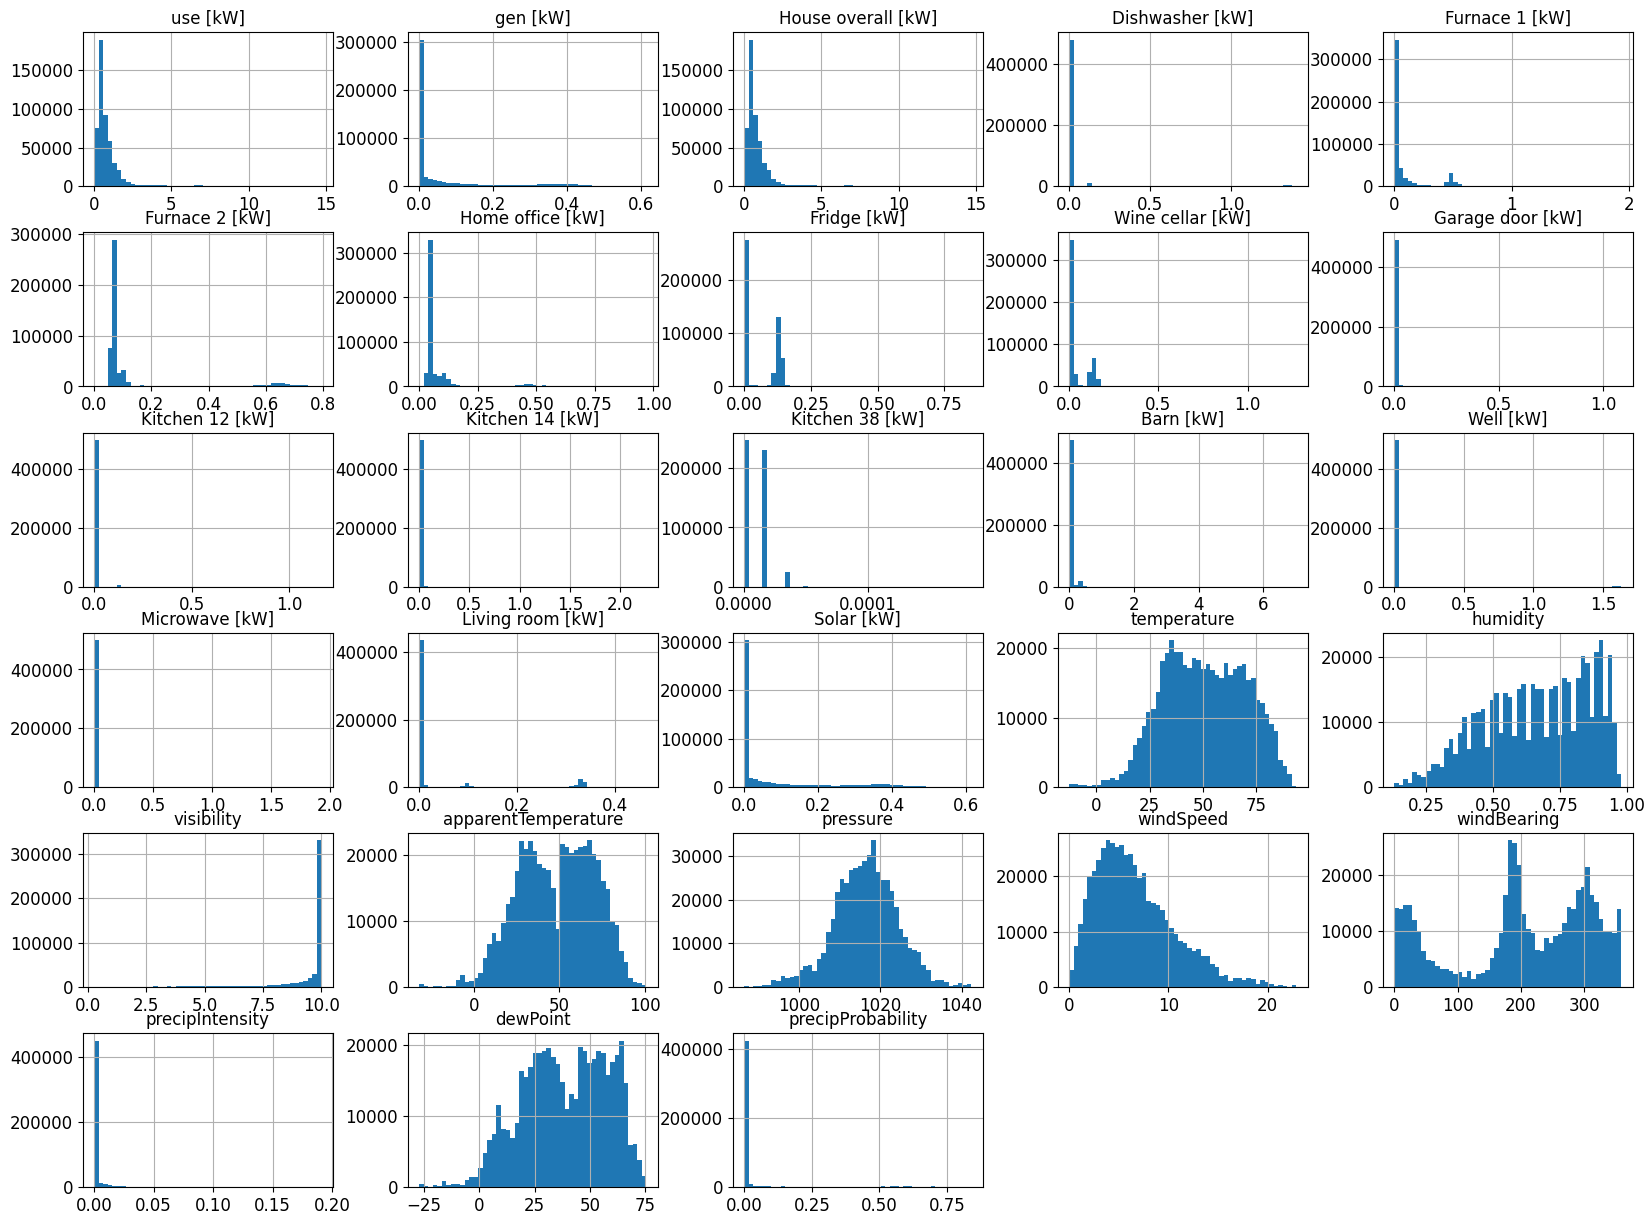

In [25]:
smarthome.hist(bins=50, figsize=(20,15))
plt.show()

What strikes you about these histograms? Look at the histograms with the temperature data - is this correct and does it refer to degrees Celsius? Was the data collected in a rainy place?

#### 3.1.2 Data cleansing <a name="3.1.2"> 

Before moving on with our exploratory analysis, it is necessary to take a look at the number of missing features our dataset contains. This is a crucial point in any data analysis, as most Machine Learning algorithms do not work with missing values. There are several options when missing values are found:

* Get rid of the instances with NaNs
* Get rid of the whole attribute
* Set the values to some vaule (zero, the mean, the median, etc. )

#### Searching for NaNs

First we need to know how many missing values there are in each attribute.To do so, we call the isnull() method along with the sum() method to add up all the missing values.

https://pandas.pydata.org/docs/reference/api/pandas.isnull.html

In [26]:
smarthome.isnull().sum()

time                   0
use [kW]               1
gen [kW]               1
House overall [kW]     1
Dishwasher [kW]        1
Furnace 1 [kW]         1
Furnace 2 [kW]         1
Home office [kW]       1
Fridge [kW]            1
Wine cellar [kW]       1
Garage door [kW]       1
Kitchen 12 [kW]        1
Kitchen 14 [kW]        1
Kitchen 38 [kW]        1
Barn [kW]              1
Well [kW]              1
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64

In section 3.1.1 when we took a quick look at the structure of the dataset, we discovered that the last row was composed of NaNs values. So we took a look at that instance. 

In [27]:
smarthome.iloc[-1 ,:]

time                     \
use [kW]               NaN
gen [kW]               NaN
House overall [kW]     NaN
Dishwasher [kW]        NaN
Furnace 1 [kW]         NaN
Furnace 2 [kW]         NaN
Home office [kW]       NaN
Fridge [kW]            NaN
Wine cellar [kW]       NaN
Garage door [kW]       NaN
Kitchen 12 [kW]        NaN
Kitchen 14 [kW]        NaN
Kitchen 38 [kW]        NaN
Barn [kW]              NaN
Well [kW]              NaN
Microwave [kW]         NaN
Living room [kW]       NaN
Solar [kW]             NaN
temperature            NaN
icon                   NaN
humidity               NaN
visibility             NaN
summary                NaN
apparentTemperature    NaN
pressure               NaN
windSpeed              NaN
cloudCover             NaN
windBearing            NaN
precipIntensity        NaN
dewPoint               NaN
precipProbability      NaN
Name: 503910, dtype: object

In this case, as it is only one row, and the whole row is full of missing values, we can delete it. To do this, the pandas library provides us with the *dropna()* method that eliminates all the rows where there are missing values. This however should not always be used, because even if there is only one attribute with missing values, the row is completely deleted when this method is called. Therefore, if more missing values are found, we would have to opt for some of the techniques described at the beginning of this section. 

In [28]:
smarthome_cleaned = smarthome.dropna() ## We delete the rows with NaNs and create a new dataset with no missing values. 

We check again that we have no missing values.

In [29]:
smarthome_cleaned.isnull().sum()

time                   0
use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Garage door [kW]       0
Kitchen 12 [kW]        0
Kitchen 14 [kW]        0
Kitchen 38 [kW]        0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         0
Living room [kW]       0
Solar [kW]             0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

#### 3.1.3 Feature engineering <a name="3.1.3"> </a>

This section deals with one of the most relevant aspects when it comes to data analysis: feature engineering. Depending on the information we want to extract from the dataset and the machine learning algorithm we want to use, the attributes must undergo different transformations. In our case, this dataset contains time series, however we do not have the date as such, but the timestamp. This is one of the transformations that the dataset must undergo, going from timestamp to dates in standard format.


#### Working with Time Series

Data publisher says the dataset contains the readings with a time span of 1 minute of house appliances in kW from a smart meter and weather conditions of that particular region. So, we set freq='min' and convert Uinx time to readable date. We would like to convert this large number that represents a unix timestamp (i.e. "1284101485") to a readable date. So, one idea is to know when the start time is. 

For this section we use the datatime and time libraries provided by Python.

In [39]:
print(' start ' , time.strftime('%Y-%m-%d %H:%M:%S %p', time.localtime(int(smarthome_cleaned['time'].iloc[0]))))

 start  2016-01-01 06:00:00 AM


As we now know that the start date is 2016-01-01 06:00:00 AM, we can generate a dataset with the dates for all instances with a frequency of 1 min. For this we make use of the *pandas.date_range* function which returns a fixed frequency DatetimeIndex. 

https://pandas.pydata.org/docs/reference/api/pandas.date_range.html

In [40]:
time_min = pd.date_range('2016-01-01 06:00 AM', periods=len(smarthome_cleaned),  freq='min') ## Fixed frequency DatetimeIndex.
                                                                                            ## datatime type.
smarthome_iot = smarthome_cleaned.set_index(time_min.strftime('%Y-%m-%d %H:%M:%S %p')) ## We create a series of string data and 
                                                                                       ## set it as a index.
smarthome_iot['Time'] = time_min ## We create a column in the dataset with the dates apart from the index.
smarthome_iot = smarthome_iot.drop(['time'], axis=1) ## We delete the previous column with the timestamps.

Thanks to datatime type we can easily extract days, months, years from the full date. This can be useful for different visualisations that we will use later on. We extract the days as numbers and the months as strings and add them as two new attributes to the dataset. 

To do this we store the values in Series (a dataframe in pandas is composed of Series, in short, the columns or attributes of the dataset). In the following code, *for loop* is used to extract the dates from the column with the dates of the dataset ('Time'). Then, once the dates are extracted, the days corresponding to that date are stored in a list. The same happens for the months. 

The operation is the same as a typical *for loop* written in other languages such as java, but python provides what is known as "List Comprehensions" which allows you to write everything in one line as you can see below. 

In [41]:
smarthome_iot['Day'] = pd.Series([date.day for date in smarthome_iot['Time']],index=time_min.strftime('%Y-%m-%d %H:%M:%S %p'))

In [42]:
smarthome_iot['Month'] = pd.Series([date.strftime("%B") for date in smarthome_iot['Time']],index=time_min.strftime('%Y-%m-%d %H:%M:%S %p'))

We now see that the dataset has been modified and new columns with days and months have been added.

In [43]:
smarthome_iot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503910 entries, 2016-01-01 06:00:00 AM to 2016-12-16 04:29:00 AM
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   use [kW]             503910 non-null  float64       
 1   gen [kW]             503910 non-null  float64       
 2   House overall [kW]   503910 non-null  float64       
 3   Dishwasher [kW]      503910 non-null  float64       
 4   Furnace 1 [kW]       503910 non-null  float64       
 5   Furnace 2 [kW]       503910 non-null  float64       
 6   Home office [kW]     503910 non-null  float64       
 7   Fridge [kW]          503910 non-null  float64       
 8   Wine cellar [kW]     503910 non-null  float64       
 9   Garage door [kW]     503910 non-null  float64       
 10  Kitchen 12 [kW]      503910 non-null  float64       
 11  Kitchen 14 [kW]      503910 non-null  float64       
 12  Kitchen 38 [kW]      503910 non-null  fl

#### Looking for Correlations

The search for correlations is another important technique in data analysis. By applying it, we can see how closely related some attributes are to others. This would benefit us in the case of being able to do without attributes that are highly related, or to find out if there are correlations between different events. It is pretty simple to compute the standard correlation coefficient between every pair of attribute using the corr() method. There are different types of correlation coefficient, in this case we use the one known as a *spearman*

### Requirements WSL

Using `panda` version higher than 2.0.0 you have to add the following statement to the `corr` method: 

```
numeric_only=True
```

See Stackoverflow for more information: https://stackoverflow.com/questions/76533178/corr-results-in-valueerror-could-not-convert-string-to-float

In [56]:
corr_matrix = smarthome_iot.corr(method='spearman', numeric_only=True)

In [57]:
corr_matrix

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability,Day
use [kW],1.000000,-0.356397,1.000000,0.295739,0.363875,0.237356,0.257088,0.142701,0.044278,-0.207381,...,-0.025779,0.004937,-0.197630,0.026389,0.046714,0.024445,-0.026863,-0.186210,-0.026885,-0.039780
gen [kW],-0.356397,1.000000,-0.356397,-0.020262,-0.222896,0.059420,-0.178654,-0.014739,0.073773,-0.137937,...,0.050703,-0.019388,0.089287,0.026398,-0.050747,-0.000576,0.045098,0.102910,0.045040,0.034932
House overall [kW],1.000000,-0.356397,1.000000,0.295739,0.363875,0.237356,0.257088,0.142701,0.044278,-0.207381,...,-0.025779,0.004937,-0.197630,0.026389,0.046714,0.024445,-0.026863,-0.186210,-0.026885,-0.039780
Dishwasher [kW],0.295739,-0.020262,0.295739,1.000000,0.283770,0.216123,-0.005521,-0.068533,-0.106633,-0.174451,...,-0.025843,0.017603,-0.146127,-0.004345,0.016203,-0.016363,0.010257,-0.140148,0.010288,0.004297
Furnace 1 [kW],0.363875,-0.222896,0.363875,0.283770,1.000000,0.269076,0.071734,-0.150542,-0.219877,-0.012237,...,-0.068176,-0.005950,-0.419858,-0.004321,0.108165,0.053649,0.003907,-0.410819,0.003890,0.044944
Furnace 2 [kW],0.237356,0.059420,0.237356,0.216123,0.269076,1.000000,-0.091574,-0.008044,-0.079264,0.032087,...,-0.071336,0.029043,-0.160010,-0.023274,0.074275,0.028570,0.017317,-0.166593,0.017290,0.088250
Home office [kW],0.257088,-0.178654,0.257088,-0.005521,0.071734,-0.091574,1.000000,-0.052482,0.068288,0.016846,...,0.025397,0.012968,-0.047226,0.061207,-0.019613,0.020719,-0.027800,-0.030502,-0.027795,-0.065541
Fridge [kW],0.142701,-0.014739,0.142701,-0.068533,-0.150542,-0.008044,-0.052482,1.000000,0.087763,0.102564,...,0.035164,-0.003577,0.160722,-0.000861,-0.039564,-0.022402,-0.000618,0.163989,-0.000599,0.007790
Wine cellar [kW],0.044278,0.073773,0.044278,-0.106633,-0.219877,-0.079264,0.068288,0.087763,1.000000,-0.010743,...,0.133237,-0.018478,0.381163,0.104181,-0.106007,-0.032875,-0.018743,0.413724,-0.018705,0.030745
Garage door [kW],-0.207381,-0.137937,-0.207381,-0.174451,-0.012237,0.032087,0.016846,0.102564,-0.010743,1.000000,...,0.031111,-0.001404,-0.008826,0.044434,-0.042543,0.027404,-0.021891,-0.007958,-0.021872,-0.045362


Let's take a look at how much each attribute correlates with House overall [kW]. 

In [58]:
corr_matrix["House overall [kW]"].sort_values(ascending=False)

use [kW]               1.000000
House overall [kW]     1.000000
Kitchen 14 [kW]        0.551989
Furnace 1 [kW]         0.363875
Dishwasher [kW]        0.295739
Well [kW]              0.279047
Home office [kW]       0.257088
Furnace 2 [kW]         0.237356
Barn [kW]              0.222076
Living room [kW]       0.218993
Fridge [kW]            0.142701
Kitchen 38 [kW]        0.048358
windSpeed              0.046714
Wine cellar [kW]       0.044278
pressure               0.026389
windBearing            0.024445
visibility             0.004937
humidity              -0.025779
precipIntensity       -0.026863
precipProbability     -0.026885
Microwave [kW]        -0.027262
Day                   -0.039780
dewPoint              -0.186210
Kitchen 12 [kW]       -0.190980
temperature           -0.196744
apparentTemperature   -0.197630
Garage door [kW]      -0.207381
gen [kW]              -0.356397
Solar [kW]            -0.356397
Name: House overall [kW], dtype: float64

The correlation coefficient ranges from -1 to 1. When it is close to 1, it means that there is a moderate positive correlation; for example, the *House overall [kW]* tends to go up when the *Kitchen 14 [kW]* goes up. When the coefficient is close to -1, it means that there is a strong negative correlation. Finally, coefficients close to 0 mean that there is no linear correlation. In this case there is a moderate negative correlation between the *Solar[kW] or gen[kW]* and *House overall [kW]*

Another way to check for correlation between attributes is to use the pandas scatter_matrix() function, which plots every numerical attribute against every other numercial attribute. Since there are now 28 numerical attributes, you would get 28x28 = 784 plots, which would not fit on a page. So let's focus on a few promising attributes that seem most correlated with the *House overall [kW]*.

array([[<Axes: xlabel='House overall [kW]', ylabel='House overall [kW]'>,
        <Axes: xlabel='Kitchen 14 [kW]', ylabel='House overall [kW]'>,
        <Axes: xlabel='Furnace 1 [kW]', ylabel='House overall [kW]'>],
       [<Axes: xlabel='House overall [kW]', ylabel='Kitchen 14 [kW]'>,
        <Axes: xlabel='Kitchen 14 [kW]', ylabel='Kitchen 14 [kW]'>,
        <Axes: xlabel='Furnace 1 [kW]', ylabel='Kitchen 14 [kW]'>],
       [<Axes: xlabel='House overall [kW]', ylabel='Furnace 1 [kW]'>,
        <Axes: xlabel='Kitchen 14 [kW]', ylabel='Furnace 1 [kW]'>,
        <Axes: xlabel='Furnace 1 [kW]', ylabel='Furnace 1 [kW]'>]],
      dtype=object)

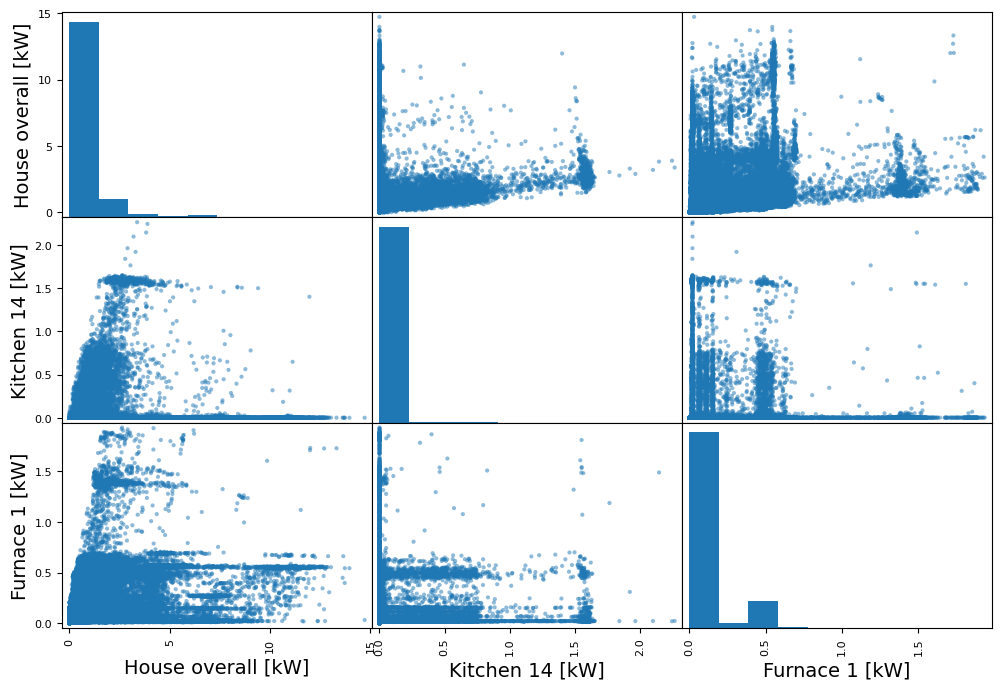

In [46]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["House overall [kW]","Kitchen 14 [kW]",'Furnace 1 [kW]']
scatter_matrix(smarthome_iot[attributes], figsize=(12, 8))

#### 3.1.4 Visualization / Outputs <a name="3.1.4"> </a>

Visualisation in data analysis is not only important to gain insight into the data you are working with, but also to reinforce the answers to questions that have arisen prior to the data analysis process. When working with Python for data analysis, the options for good visualisations are many. Matplotlib is usually the epicentre of it all, although there are other solutions that rely on matplotlib to make some of the tasks simpler and get more eye-catching graphs, one example is the Seaborn library.

https://seaborn.pydata.org/index.html

This library has a gallery where you can see all the graphics available. It is as simple as visiting the gallery and selecting the one you want. Afterwards, you only have to implement small changes in the code. 

You can also take a look at the Python Graph Gallery where there are a large number of solutions for visualisations in Python.

https://www.python-graph-gallery.com/

#### House overall [kW] per month

In this section we look at how consumption has evolved over the months. To do so, we make use of the Seaborn library. 

<Axes: xlabel='Month', ylabel='House overall [kW]'>

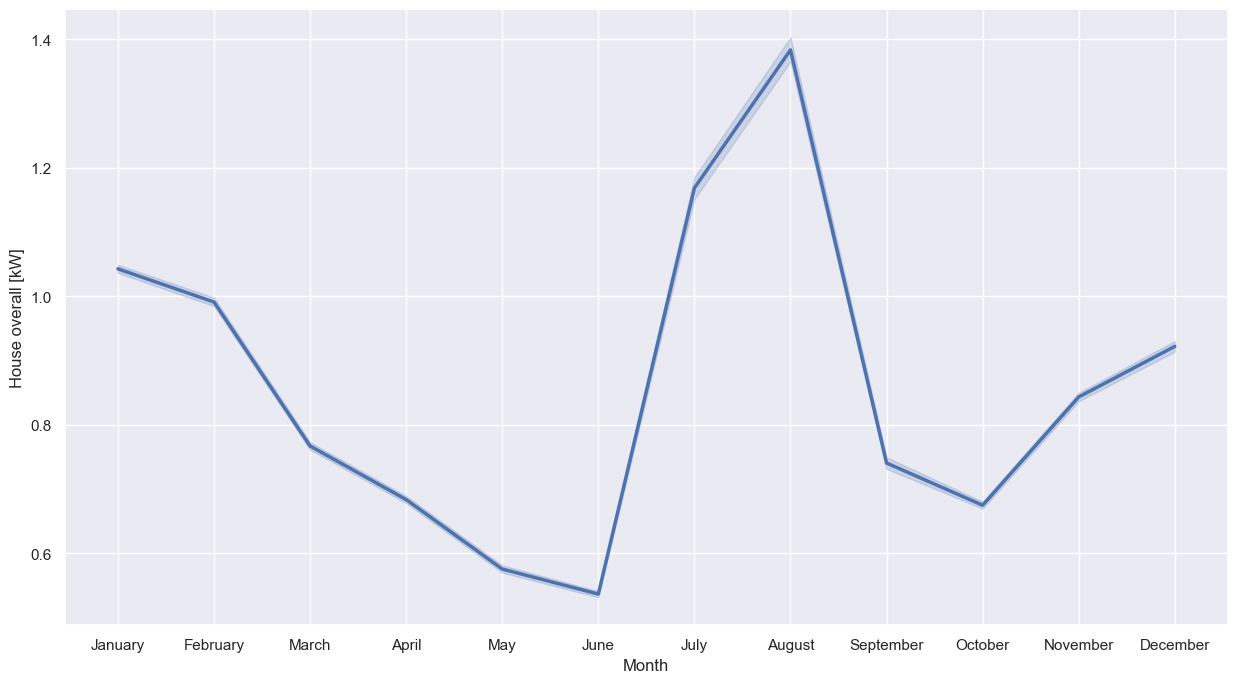

In [47]:
sns.set_style("whitegrid")

sns.set(rc = {'figure.figsize':(15,8)})

sm_kw_overall = smarthome_iot[["Time","Day","Month","House overall [kW]"]] ## We create a subset from the datset 
                                                                            ## with the columns we want to study

sns.lineplot(data=sm_kw_overall,x="Month", y="House overall [kW]", linewidth=2.5)

# 4. Exercise 1: Exploratory data analysis <a name="4."> </a>

To answer the exercises try to make some visualisation using some of the libraries described. 

## 4.1 Visualise consumption by season of the year <a name="4.1">
* **Winter**: December to March
* **Spring**: March to June
* **Summer**: June to September
* **Autumn**: September to December

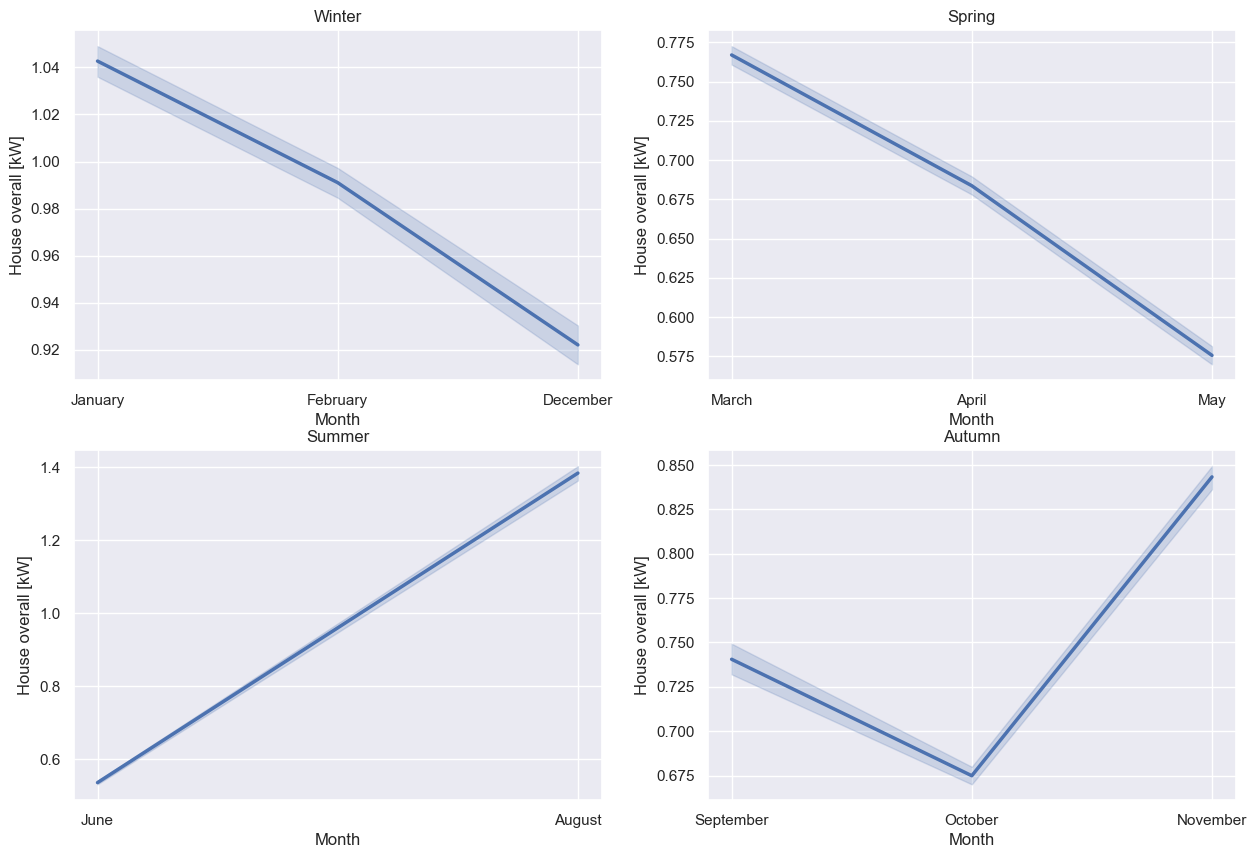

In [98]:
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(8,4)})
## We create a subset from the datset with the columns we want to study
sm_kw_overall = smarthome_iot[["Month","House overall [kW]"]]
sm_kw_winter = sm_kw_overall[sm_kw_overall['Month'].isin(['December','January','February'])]
sm_kw_spring = sm_kw_overall[sm_kw_overall['Month'].isin(['March','April','May'])]
sm_kw_summer = sm_kw_overall[sm_kw_overall['Month'].isin(['June','Juli','August'])]
sm_kw_autumn = sm_kw_overall[sm_kw_overall['Month'].isin(['September','October','November'])]
#plot all four diagrams in one figure
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.lineplot(ax=axes[0, 0],data=sm_kw_winter,x="Month", y="House overall [kW]", linewidth=2.5)
sns.lineplot(ax=axes[0, 1],data=sm_kw_spring,x="Month", y="House overall [kW]", linewidth=2.5)
sns.lineplot(ax=axes[1, 0],data=sm_kw_summer,x="Month", y="House overall [kW]", linewidth=2.5)
sns.lineplot(ax=axes[1, 1],data=sm_kw_autumn,x="Month", y="House overall [kW]", linewidth=2.5)
axes[0, 0].set_title('Winter')
axes[0, 1].set_title('Spring')
axes[1, 0].set_title('Summer')
axes[1, 1].set_title('Autumn')
plt.show()


### 4.1.1 In which month within each season is the most energy consumed? <a name="4.1.1"> 

In [110]:
winter_top = sm_kw_winter.groupby(['Month']).sum().sort_values(by='House overall [kW]', ascending=False).head(1)
spring_top = sm_kw_spring.groupby(['Month']).sum().sort_values(by='House overall [kW]', ascending=False).head(1)
summer_top = sm_kw_summer.groupby(['Month']).sum().sort_values(by='House overall [kW]', ascending=False).head(1)
autumn_top = sm_kw_autumn.groupby(['Month']).sum().sort_values(by='House overall [kW]', ascending=False).head(1)

print('Highest energy consumption in winter: ', winter_top.index[0], '\t with', winter_top['House overall [kW]'].values[0].round(2), 'kW')
print('Highest energy consumption in spring: ', spring_top.index[0], '\t with', spring_top['House overall [kW]'].values[0].round(2), 'kW')
print('Highest energy consumption in summer: ', summer_top.index[0], '\t with', summer_top['House overall [kW]'].values[0].round(2), 'kW')
print('Highest energy consumption in autumn: ', autumn_top.index[0], ' with', autumn_top['House overall [kW]'].values[0].round(2), 'kW')


Highest energy consumption in winter:  January 	 with 46170.27 kW
Highest energy consumption in spring:  March 	 with 34238.88 kW
Highest energy consumption in summer:  August 	 with 61755.85 kW
Highest energy consumption in autumn:  November  with 36431.67 kW


### 4.1.2 Which appliances consume the most energy within that period? <a name="4.1.2">

#### Period Winter: January

In [71]:
## We create a subset from the datset with the month we want to study
january_data = smarthome_iot[smarthome_iot['Month'].isin(['January'])]
## Then we look for the correlation between House overall [kW] and the rest of the columns
january_corr = january_data.corr(method='spearman', numeric_only=True)
## Finally we sort the values in descending order and print the top one
january_corr["House overall [kW]"].sort_values(ascending=False).head(3)

use [kW]              1.000000
House overall [kW]    1.000000
Furnace 2 [kW]        0.460056
Name: House overall [kW], dtype: float64

#### Period Spring: March

In [72]:
## We do the same like done for January but for the other periods
march_data = smarthome_iot[smarthome_iot['Month'].isin(['March'])]
march_corr = march_data.corr(method='spearman', numeric_only=True)
march_corr["House overall [kW]"].sort_values(ascending=False).head(3)

use [kW]              1.000000
House overall [kW]    1.000000
Kitchen 14 [kW]       0.598588
Name: House overall [kW], dtype: float64

#### Period Summer: August

In [73]:
august_data = smarthome_iot[smarthome_iot['Month'].isin(['August'])]
august_corr = august_data.corr(method='spearman', numeric_only=True)
august_corr["House overall [kW]"].sort_values(ascending=False).head(3)

use [kW]              1.000000
House overall [kW]    1.000000
Kitchen 14 [kW]       0.476496
Name: House overall [kW], dtype: float64

#### Period Autumn: November

In [74]:
november_data = smarthome_iot[smarthome_iot['Month'].isin(['November'])]
november_corr = november_data.corr(method='spearman', numeric_only=True)
november_corr["House overall [kW]"].sort_values(ascending=False).head(3)

use [kW]              1.000000
House overall [kW]    1.000000
Kitchen 14 [kW]       0.597161
Name: House overall [kW], dtype: float64

#### Highest consumption in each season

### 4.1.3 Is there any relationship between weather conditions and the highest energy consumption in those peak periods? <a name="4.1.3"> 

#### Period Winter: January

In [81]:
# Is there any relationship between weather conditions and the highest energy consumption in those peak periods?
january_weather_data = january_data[["House overall [kW]", "temperature","humidity","visibility","pressure","windSpeed","cloudCover","windBearing","precipIntensity","dewPoint","precipProbability"]]
january_weather_corr = january_weather_data.corr(method='spearman', numeric_only=True)
january_weather_corr["House overall [kW]"].sort_values(ascending=False)

House overall [kW]    1.000000
windSpeed             0.152279
windBearing           0.084453
visibility           -0.007473
pressure             -0.020146
precipProbability    -0.020357
precipIntensity      -0.020412
humidity             -0.077044
temperature          -0.090073
dewPoint             -0.103391
Name: House overall [kW], dtype: float64

Shows that there is no real relationship between weather conditions and energy consumption in winter.

#### Period Spring: March

In [82]:
march_weather_data = march_data[["House overall [kW]", "temperature","humidity","visibility","pressure","windSpeed","cloudCover","windBearing","precipIntensity","dewPoint","precipProbability"]]
march_weather_corr = march_weather_data.corr(method='spearman', numeric_only=True)
march_weather_corr["House overall [kW]"].sort_values(ascending=False)

House overall [kW]    1.000000
windBearing           0.051724
visibility            0.019546
windSpeed             0.018412
humidity              0.003946
dewPoint             -0.001799
temperature          -0.006530
pressure             -0.068272
precipProbability    -0.083770
precipIntensity      -0.083835
Name: House overall [kW], dtype: float64

Same in spring, the correlation values are near to 0 which means that there is no real relationship between weather conditions and energy consumption in spring, too.

#### Period Summer: August

In [83]:
august_weather_data = august_data[["House overall [kW]", "temperature","humidity","visibility","pressure","windSpeed","cloudCover","windBearing","precipIntensity","dewPoint","precipProbability"]]
august_weather_corr = august_weather_data.corr(method='spearman', numeric_only=True)
august_weather_corr["House overall [kW]"].sort_values(ascending=False)

House overall [kW]    1.000000
pressure              0.052549
windBearing           0.047971
visibility            0.047955
humidity              0.018439
windSpeed            -0.049581
temperature          -0.065179
precipIntensity      -0.107750
precipProbability    -0.107890
dewPoint             -0.112923
Name: House overall [kW], dtype: float64

#### Period Autumn: November

In [84]:
november_weather_data = november_data[["House overall [kW]", "temperature","humidity","visibility","pressure","windSpeed","cloudCover","windBearing","precipIntensity","dewPoint","precipProbability"]]
november_weather_corr = november_weather_data.corr(method='spearman', numeric_only=True)
november_weather_corr["House overall [kW]"].sort_values(ascending=False)

House overall [kW]    1.000000
pressure              0.095929
visibility            0.019671
windSpeed            -0.018941
windBearing          -0.051273
temperature          -0.060043
humidity             -0.063094
dewPoint             -0.066301
precipIntensity      -0.089463
precipProbability    -0.089534
Name: House overall [kW], dtype: float64

### 4.1.4 In which weather conditions was the most energy consumed? <a name="4.1.4"> 

In [91]:
## We create a subset from the datset with the columns we want to study
weather = smarthome_iot[["House overall [kW]","icon","summary","temperature","humidity","visibility","apparentTemperature","pressure","windSpeed","cloudCover","windBearing","precipIntensity","dewPoint","precipProbability"]]
## We create a correlation matrix with the method spearman
weather_corr = weather.corr(method='spearman', numeric_only=True)
## We sort the correlation matrix by the column "House overall [kW]"
weather_corr["House overall [kW]"].sort_values(ascending=False).head(2)

House overall [kW]    1.000000
windSpeed             0.046714
Name: House overall [kW], dtype: float64

Looks like there is the most energy consumed when the weather is `windy` so lets take a look how the energy consumption is distributed when the weather is windy.

<Axes: xlabel='windSpeed', ylabel='House overall [kW]'>

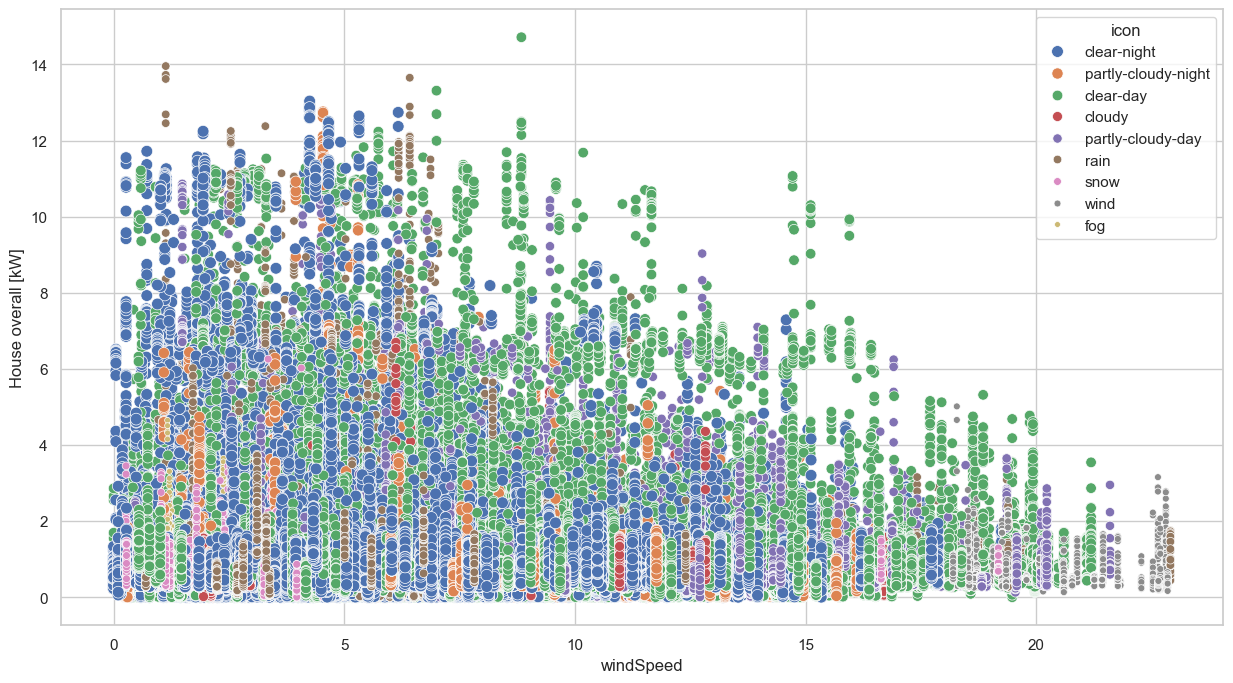

In [89]:
sns.set_theme(style="whitegrid")
sns.scatterplot(data=weather, x="windSpeed", y="House overall [kW]",
                hue="icon", size="icon", palette="deep")

# Section 2: Machine Learning and Deep Learning models <a name="Section2"> 

## 5. Data analysis - Different approaches <a name="5."> 

Once the exploratory analysis has been carried out, it is time to move on to the selection of models for prediction or classification. In this section we will go from solutions that do not implement any ML algorithm to Deep Learning, including the use of classical ML algorithms. As our dataset contains time series, some of the methods / algorithms that are commonly used with this type of data are shown.

### 5.1. Non-Machine Learning approach <a name="5.1"> 

#### Moving Average

In statistics, a moving average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set. In finance, a moving average (MA) is a stock indicator that is commonly used in technical analysis. The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price. In short, it helps us to visualise the trend of the time series.

It basically states that the next observation is the mean of every past observation. Therefore, we assume that the future value of our variable depends on the average of its  *k*  previous values. 

$$
y_t = 1/k \sum (y_t - n )
$$


Pandas has an implementation available with *DataFrame.rolling(window).mean()* 

In the following code, the moving average model is implemented within a function that shows us in a visual way the result after its application (i.e. the trend). The function also includes the option to display the anomalies.

In [113]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):
    

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(25,5))
    plt.title("Moving average with window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)


The wider the window, the smoother the trend. In the case of very noisy data, which is often encountered in finance, this procedure can help detect common patterns.

#### Moving Average with a window of 6 hours

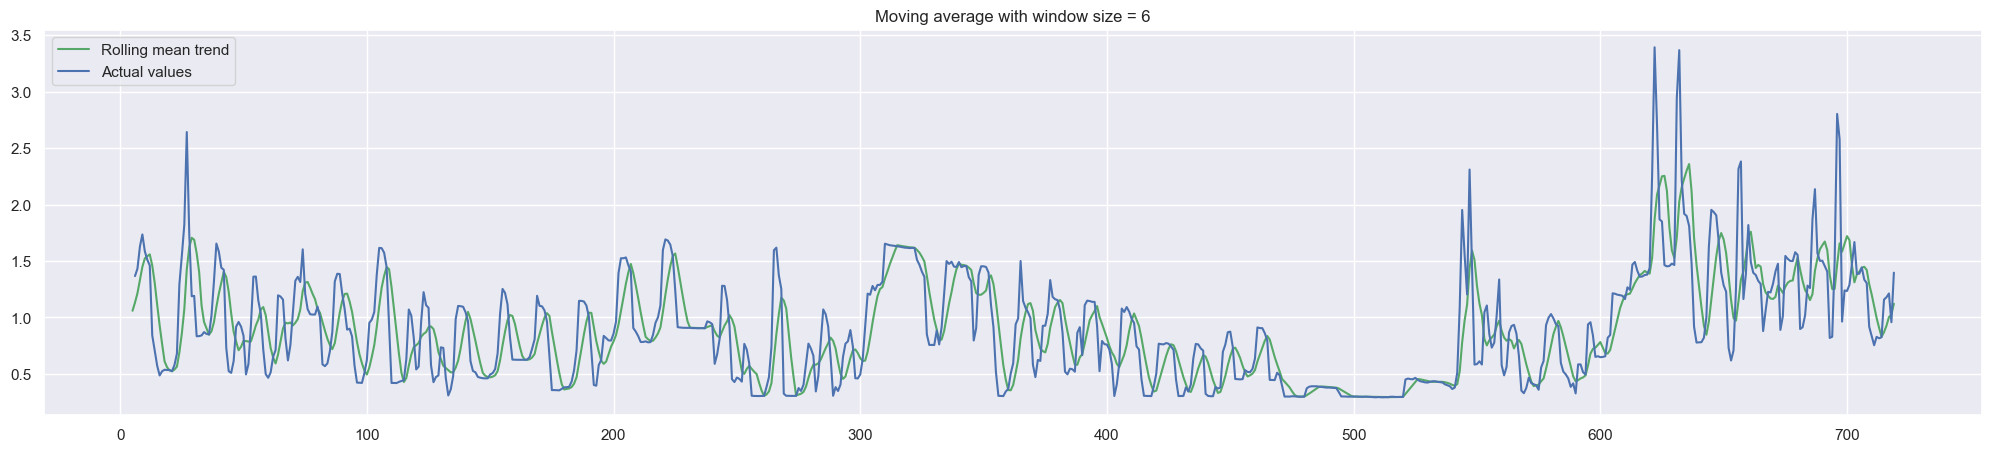

In [114]:
n_samples = 24*30 # 1 month
cols = ['House overall [kW]']
plotMovingAverage(smarthome_cleaned[cols][:n_samples], window=6) # A window of 6 hours

#### Moving Average with a window of 24 hours

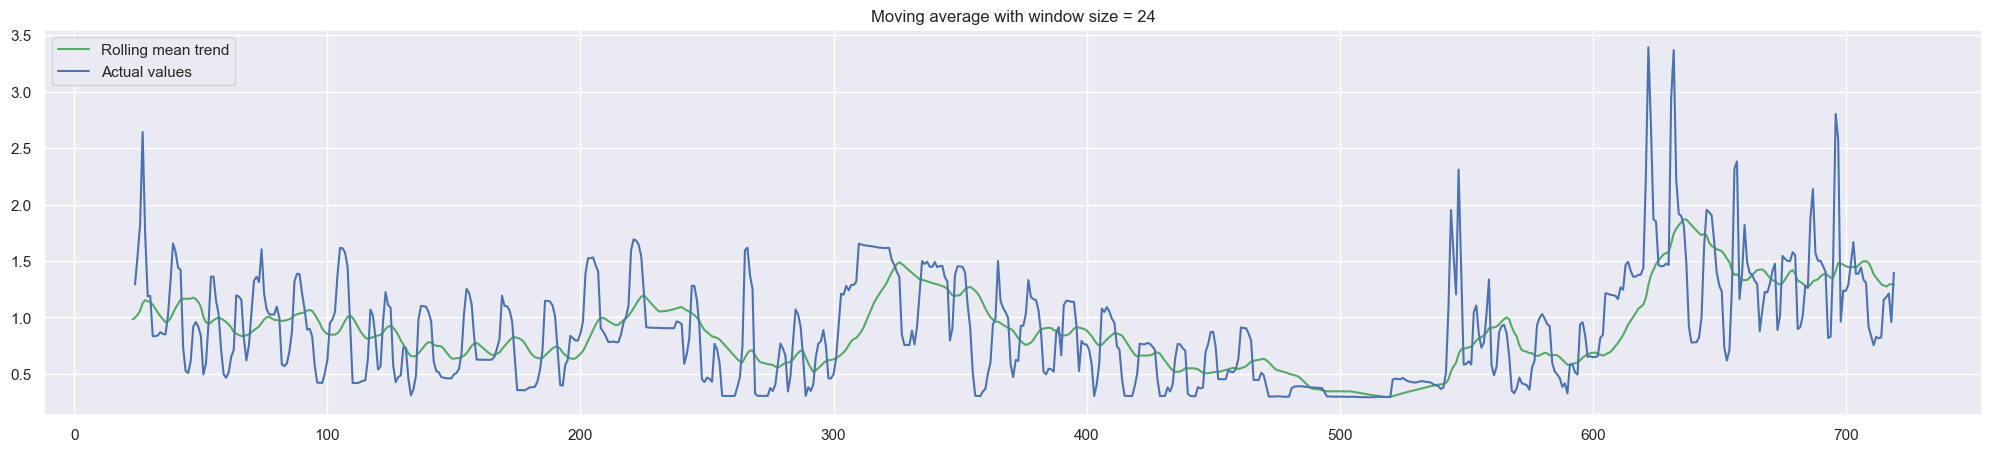

In [115]:
plotMovingAverage(smarthome_cleaned[cols][:n_samples], window=24) # A window of 24 hours

#### Anomaly detection

The simplest way to detect anomaly in time-series is using the moving average as the trend of the data and points that are deviate from the moving average be considered as anomaly.

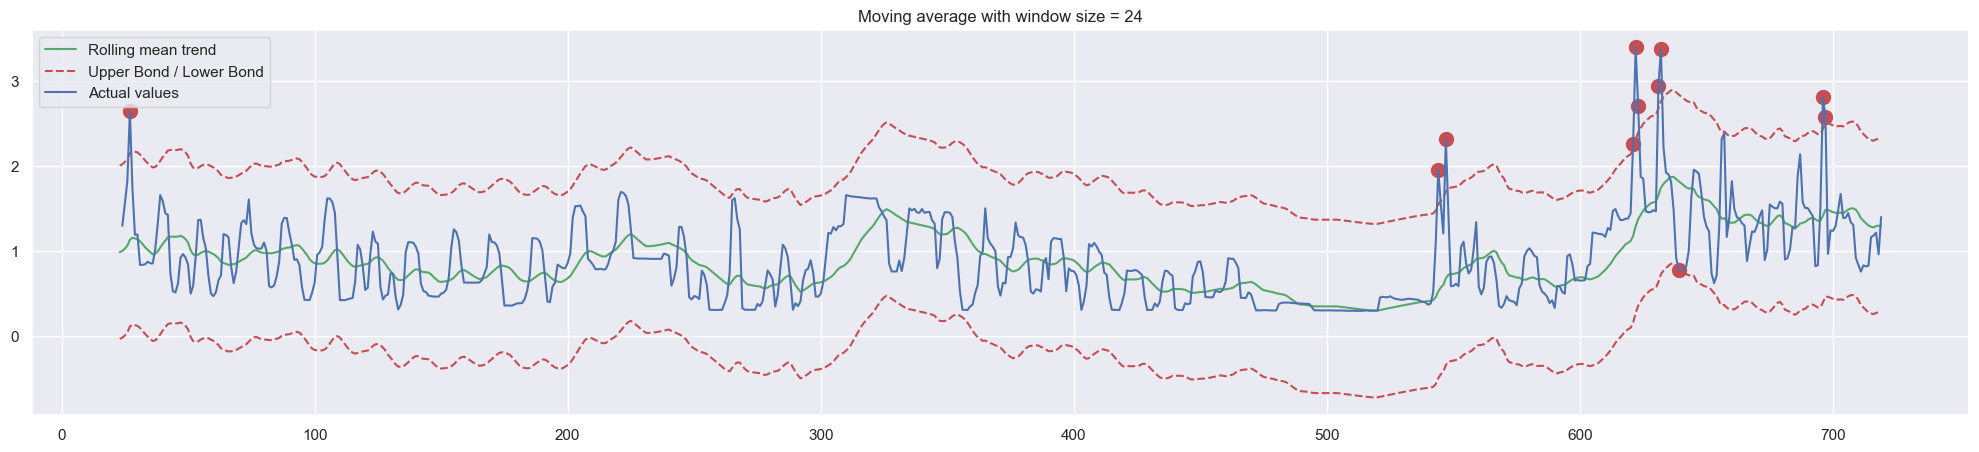

In [116]:
plotMovingAverage(smarthome_cleaned[cols][:n_samples], window=24, plot_intervals=True, plot_anomalies=True)

### 5.2 Machine learning approach <a name="5.2"> 

In this section we are going to train several estimators to predict what the energy consumption will be, using as input data, the data that refer to the climatic conditions.Training a regressor is very simple in Sklearn. As with a classifier, just create an object of the estimator you want to train and execute the <code>fit</code> method. In this notebook we use two of the most common regressors: <code>LinearRegression</code> and <code>Random Forest Regressor</code>

#### 5.2.1 Simple ML Algorithm implementation using Scikit-Learn <a name="5.2.1"> 

#### Data preparation 

Normalisation is a technique often applied as part of data preparation for machine learning.  The purpose of normalisation is to change the values in the numerical columns of the data set to use a common scale, without distorting the differences in the ranges of values or losing information. Normalisation is also necessary for some algorithms to model the data correctly, such as Support vector machine (SVM). In our case for Linear Regression and Random Forest Regressor it is not essential for the data to be normalised, so we will not implement it. 

In this data preparation stage, we split the data into training and tes data.

In [118]:
def prepare_dataset_for_training_filtered_by_weather(dataset):
    
    X = dataset[['temperature','humidity', 'visibility','windSpeed', 'pressure', 'windBearing', 'precipIntensity','precipProbability']]
    Y = dataset['use [kW]']
    
    train_ratio = 0.80
    test_ratio = 0.20

    # Using train_test_split() from the data science library scikit-learn, you can split your dataset into subsets 
    # that minimize the potential for bias in your evaluation and validation process
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_ratio)
    
    
    return x_train,x_test,y_train,y_test

In [119]:
x_train,x_test,y_train,y_test = prepare_dataset_for_training_filtered_by_weather(smarthome_iot)

#### Linear Regression

Linear Regression is a mathematical model used to approximate the relationship between a dependent variable $y$, and the independent variables $x_i$. The model is expressed by the following formula:

$$
y \approx \alpha+\beta_1x_1+\beta_2x_2...+\beta_nx_n
$$

Sklearn provides several methods to perform linear regression. The simplest of these is the _least squares_ method, which is implemented by the <code>LinearRegression</code> estimator. The least squares technique is used to determine the coefficients of a regression function that minimise the sum of squares of the errors. For a linear regression function, one would try to minimise this expression:

$$
S = \sum (y - f(X))^2 = \sum (y - \alpha+\beta_1x_1+\beta_2x_2...+\beta_nx_n)^2
$$


We imported the LinearRegresssion model in section *1. Setup - Libraries import*. It is time to create the estimator and train it on the input data.

In [120]:
linearRegressor = LinearRegression() 
linearRegressor.fit(x_train,y_train) ## Fit linear model

LinearRegression()

Once a regressor is trained, we can use it to predict the class of a set of instances with the <code>predict</code> method.

In [121]:
linearRegressor.predict(x_train[:5]) ## Here we select the first 5 instances of the training set

array([0.83476373, 0.85980339, 0.81932787, 0.88921397, 0.75530674])

In [122]:
y_train[:5]

2016-05-11 04:08:00 AM    0.382700
2016-07-03 22:12:00 PM    0.810400
2016-09-28 15:54:00 PM    0.419233
2016-04-17 17:07:00 PM    0.129000
2016-07-24 13:34:00 PM    0.420500
Name: use [kW], dtype: float64

Return the coefficient of determination of the prediction.The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a  R<sup>2</sup> score of 0.0.

In [123]:
linearRegressor.score(x_train, y_train)

0.0028768026496792665

#### Random Forest Regressor

Random forests (RF) construct many individual decision trees at training. Predictions from all trees are pooled to make the final prediction; the mode of the classes for classification or the mean prediction for regression. As they use a collection of results to make a final decision, they are referred to as Ensemble techniques

In [124]:
RandomForestRss = RandomForestRegressor(max_depth=5, random_state=0)
RandomForestRss.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, random_state=0)

Once a regressor is trained, we can use it to predict the class of a set of instances with the <code>predict</code> method.

In [125]:
RandomForestRss.predict(x_train[:5]) ## Here we select the first 5 instances of the training set

array([0.73305393, 0.89588341, 0.75519237, 0.83426772, 0.9046054 ])

In [126]:
y_train[:5]

2016-05-11 04:08:00 AM    0.382700
2016-07-03 22:12:00 PM    0.810400
2016-09-28 15:54:00 PM    0.419233
2016-04-17 17:07:00 PM    0.129000
2016-07-24 13:34:00 PM    0.420500
Name: use [kW], dtype: float64

Return the coefficient of determination of the prediction.The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a  R<sup>2</sup> score of 0.0.

In [127]:
RandomForestRss.score(x_train, y_train)

0.08522056379783771

#### 5.2.2 Evaluation of an ML algorithm (Regression) <a name="5.2.2"> 

In classification tasks the evaluation metrics are based on the number of correct predictions. In regression, however, one cannot speak of accuracy since the predictions are numerical and it is very unlikely to predict exactly the correct value. The important thing in evaluating a regressor is to measure the difference between the actual value and the predicted value.

Three of the most popular metrics for assessing the quality of regressors:

**Mean Absolute Error**
$$
MAE = \frac{\sum |\;y -f(X)\;|}{n}
$$
**Mean Squared Error**
$$
MSE = \frac{\sum (y -f(X))^2}{n}
$$
**Coefficient of determination**
$$
R2 = 1 - \frac{\sum (y -f(X))^2}{\sum (\bar{y} - y)}
$$

### 5.2.3 Evaluation of an ML algorithm using Cross-Validation <a name="5.2.3"> 

One way to evaluate the models would be to use the *train_test_split()* function to split the training set into a smaller training set and a validation set, then train the models against the smaller training set and evaluate them against the validation set. It works fairly well. However, a great alternative is to use Scikit-Learn's K-fold cross-validation feature. In this section, we are going to split the training set into 10 distinct subset called folds, then it trains and evaluate the models 10 times, picking a different fold for evaluaiton every time and training on the other 9 folds. The result will be an array containing the 10 evaluation scores. 

We are going to use a function that display the result after the training:


In [128]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

#### Linear Regression

##### cross-validation scores

In [129]:
scores_linear_regression = cross_val_score(linearRegressor, x_train, y_train, scoring="neg_mean_squared_error", cv=20)

In [130]:
display_scores(np.sqrt(-scores_linear_regression))

Scores: [1.03163709 1.05104329 1.08949796 1.05957241 1.05269471 1.04297449
 1.06626793 1.07723886 1.05487564 1.05586932 1.09039976 1.03952208
 1.05166395 1.0773893  1.04948485 1.06471135 1.04767586 1.06299215
 1.02223136 1.02961557]
Mean: 1.055867896324219
Standard deviation: 0.018021072474049944


##### cross-validation predictions

In [131]:
y_pred = cross_val_predict(linearRegressor,x_train,y_train,cv=20)
print(y_pred)

[0.83500697 0.85989814 0.82124658 ... 0.8928991  0.82173295 0.89751235]


#### Random Forest Regressor

##### cross-validation scores

In [132]:
scores_random_forest = cross_val_score(RandomForestRss, x_train, y_train, scoring="neg_mean_squared_error", cv=3)

In [133]:
display_scores(np.sqrt(-scores_random_forest))

Scores: [1.01103372 1.0179745  1.01086432]
Mean: 1.0132908463732915
Standard deviation: 0.0033125684981311905


##### cross-validation predictions

In [134]:
y_pred = cross_val_predict(linearRegressor,x_train,y_train,cv=3)
print(y_pred)

[0.82818466 0.86138904 0.81582578 ... 0.89479916 0.82114554 0.89891816]


### 5.2.4 Fine tune the ML model <a name="5.2.4"> 

Random Forest regressor yiels better results than Linear Regression. Once we have decided what models is best, it is time to fine-tune it. One option would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. This would be tedious work, and you may not have time to explore many combinations.

Instead, we are going to use *Scikit-Learn's GridSearchCV* to search. All we need to do is to select a set of hyperparmeters to experiment and what values to try out. Then it will use corss-validation to evaluate all the possible vominations of hyperparmer values. For example, the following code searches for the best combination of hyperparameter values for the RandomForestRegressor.

In [135]:
param_grid = [
    # try 9 (3×3) combinations of hyperparameters
    {'n_estimators': [5, 10, 20],'max_features': [2, 4, 6]},
    # then try 4 (2×2) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 4]},
  ]

RandomForestRss_Grid = RandomForestRegressor(random_state=42)

# train across 2 folds, that's a total of (9+4)*2= 26 rounds of training 
grid_search = GridSearchCV(RandomForestRss_Grid, param_grid, cv=2,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6],
                          'n_estimators': [5, 10, 20]},
                         {'bootstrap': [False], 'max_features': [2, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

When you have no idea what value a hyperparameter should have, a simple approach is to try out consecutive powers of 10 (or a smaller number if you want a more fine-grained search). 

The *param_grid* tells Scikit-Learn to first evaluate all 3 x 3 = 9 combinations of n_estimators and max_features hyperparmeter values specified in the first dictionary (dict). Then try all 2 x 2 = 4 combinations of hyperparmeter values in the second dict, but this time with the boostrap hyperparameter set to False. 

The grid search will explore 9 + 4 = 13 combinations of RandomForestRegressor hyperparameter values, and it will train each model 2 times, since we are using two-fold cross validation. (cv should be higher, but the more high is the cv, the more time it takes to look for the best parameters)

It may take a bit of time!!!!

Once it is done, we can get the best hyperparameter combination found:

In [136]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 3}

We can also get the best estimator directly:

In [137]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=2, n_estimators=3,
                      random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [138]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.7102511037513384 {'max_features': 2, 'n_estimators': 5}
0.7091799104491912 {'max_features': 2, 'n_estimators': 10}
0.7083387339505783 {'max_features': 2, 'n_estimators': 20}
0.7102511037513384 {'max_features': 4, 'n_estimators': 5}
0.7091799104491912 {'max_features': 4, 'n_estimators': 10}
0.7083387339505783 {'max_features': 4, 'n_estimators': 20}
0.7102511037513384 {'max_features': 6, 'n_estimators': 5}
0.7091799104491912 {'max_features': 6, 'n_estimators': 10}
0.7083387339505783 {'max_features': 6, 'n_estimators': 20}
0.7074948212574381 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.7074948212574381 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.7074948212574381 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
0.7074948212574381 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [139]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,1.793082,0.196008,0.291392,0.008503,2,5,NaN,"{'max_features': 2, 'n_estimators': 5}",-0.504269,-0.504644,-0.504457,0.000187,11,-0.458217,-0.458817,-0.458517,0.000300
1,3.321827,0.136811,0.677252,0.082014,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.502557,-0.503315,-0.502936,0.000379,8,-0.456128,-0.457039,-0.456584,0.000455
2,6.276253,0.703659,0.986192,0.044110,2,20,NaN,"{'max_features': 2, 'n_estimators': 20}",-0.501474,-0.502014,-0.501744,0.000270,5,-0.455070,-0.455888,-0.455479,0.000409
3,2.759566,0.492106,0.332700,0.042874,4,5,NaN,"{'max_features': 4, 'n_estimators': 5}",-0.504269,-0.504644,-0.504457,0.000187,11,-0.458217,-0.458817,-0.458517,0.000300
4,6.188262,0.269067,0.708193,0.116701,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.502557,-0.503315,-0.502936,0.000379,8,-0.456128,-0.457039,-0.456584,0.000455
5,11.444429,1.005216,1.116557,0.065346,4,20,NaN,"{'max_features': 4, 'n_estimators': 20}",-0.501474,-0.502014,-0.501744,0.000270,5,-0.455070,-0.455888,-0.455479,0.000409
6,3.475283,0.090968,0.304889,0.014913,6,5,NaN,"{'max_features': 6, 'n_estimators': 5}",-0.504269,-0.504644,-0.504457,0.000187,11,-0.458217,-0.458817,-0.458517,0.000300
7,6.978186,0.741898,0.520095,0.005233,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.502557,-0.503315,-0.502936,0.000379,8,-0.456128,-0.457039,-0.456584,0.000455
8,12.641933,0.156436,0.975752,0.006555,6,20,NaN,"{'max_features': 6, 'n_estimators': 20}",-0.501474,-0.502014,-0.501744,0.000270,5,-0.455070,-0.455888,-0.455479,0.000409
9,1.086744,0.080331,0.182308,0.000933,2,3,False,"{'bootstrap': False, 'max_features': 2, 'n_est...",-0.500871,-0.500226,-0.500549,0.000323,1,-0.454077,-0.454816,-0.454446,0.000369


####  Evaluation of the System on the Test Set

In [140]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [141]:
final_rmse

0.7061332552018462

Once the best parameters have been selected and the model has been trained. This stage will be completed and the model will be saved for production.

#### Model persistence using joblib

You can easily save Scikit-Learn models by using Python's pickle module or by using the joblib library, which is more efficient at serializing large NumPy arrays.

In [142]:
##import joblib
##joblib.dump(my_model, "my_model.pkl") # DIFF
#...
##my_model_loaded = joblib.load("my_model.pkl") # DIFF

### 5.3. Deep learning approach <a name="5.3"> 

In this section we will build and train a neural network for the same purpose as machine learning models. Predicting energy consumption depending on weather conditions. 

#### 5.3.1 Time-Series prediction with LSTM - Deep Learning <a name="5.3.1"> 

For this exercise we are going to build and train an LSTM using the keras library. You can see a similar example here: 

https://keras.io/examples/timeseries/timeseries_weather_forecasting/

#### Data preparation

First of all we need to separate the data into data for training, for testing and in this case that we make use of a Deep Learning model, we also have the validation data. The validation data is used to validate how good the training of the network is before it sees the test data. 

In [143]:
def prepare_dataset_for_training_filtered_by_weather(dataset):
    
    X = dataset[['temperature','humidity', 'visibility','windSpeed', 'pressure', 'windBearing', 'precipIntensity','precipProbability']]
    Y = dataset['use [kW]']
    
    ## Percentage of dataset for training, test and validation
    train_ratio = 0.75
    validation_ratio = 0.15
    test_ratio = 0.10

    # Train is now 75% of the entire data set
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1 - train_ratio)
    
    # Test is now 10% of the initial data set
    # Validation is now 15% of the initial data set
    x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))
    
    # The Keras library works with tensors or numpy arrays. 
    # Therefore we need to transform our input data into tensors that tell us how many instances we have, how many attributes 
    # and the number of dimensions of the dataset (this is especially important if you work with photographs). 
    x_train = np.reshape(x_train.values, (x_train.shape[0], x_train.shape[1],1))
    x_val = np.reshape(x_val.values, (x_val.shape[0], x_test.shape[1],1))
    x_test = np.reshape(x_test.values, (x_test.shape[0], x_test.shape[1],1))
    
    return x_train,x_val,x_test,y_train,y_val,y_test

In [144]:
x_train,x_val,x_test,y_train,y_val,y_test = prepare_dataset_for_training_filtered_by_weather(smarthome_iot)

In [145]:
print("x_train: {}, y_train: {} ; x_test: {}, y_test {} ; x_val: {}, y_val: {}".format(x_train.shape, y_train.shape, x_test.shape,
                                                                                    y_test.shape,x_val.shape,y_val.shape))


x_train: (377932, 8, 1), y_train: (377932,) ; x_test: (50392, 8, 1), y_test (50392,) ; x_val: (75586, 8, 1), y_val: (75586,)


#### Definiton of the DL model architecture: Construction of the neural network

We create the model using the Sequential API.

* 1) The first line creates a Sequential model. This is the simplest kind of Keras model for neural networks that are jus compose of a single stack of layers connected sequentally. This is called the Sequential API.
* 2) Then we add 2 layers, two LSTM layers with 32 neurons each: https://keras.io/api/layers/recurrent_layers/lstm/
* 3) Finally we add a Dense output layer with 1 neuron (output): https://keras.io/api/layers/core_layers/dense/

In [ ]:
model = Sequential()
model.add(LSTM(units=32, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=32))
model.add(Dense(units = 1))
model.summary()

The model's summary() method displays all the model's layers, including each layer's name, its output shape and its number of parameters. The summary ends with the total nubmer of parameters, including trainable and non-trainable parameters. 

#### Compilation of the DL model

After a model is created, you must call ist compile() method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation. 

https://keras.io/api/models/model_training_apis/

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae'])

#### Training of the DL model: Fit model on training data

Now the model is ready to be trained. For this we simply need to call its fit() method. An epoch means training the neural network with all the training data for one cycle. In an epoch, we use all of the data exactly once. An epoch is made up of one or more batches, where we use a part of the dataset to train the neural network.

We pass the model he impot features (x_train) and the target (y_train), as well as the number of epochs to train. We also pass a validation set. Keras will measure the loss and the extra metrics on this set at the end of each epoch, whichis very useful to see how well the model really performs. If the performance on the training set is much better than on the validation set, the model is probably overfitting the training set.

At each epoch during training, Keras displays the number of instances processed so far (along with a progress bar), the mean training time per sample, and the loss and the accuracy  or any extra metrics (if asked) on both the training set and validation set. 

The *fit()* method returns a History object containing the training parameters (history.params), the list of epochs it went through (history.epoch) and most importantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set an on the validation set. If you use this dictionary to create pandas DataFrame and call its plot() method, you will get the learning curves shown down below in the *Evaluation of the model*

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 264, validation_data=(x_val,y_val))

#### Evaluation of the DL model

Learning curves: The mean training loss measured over each epoch. 

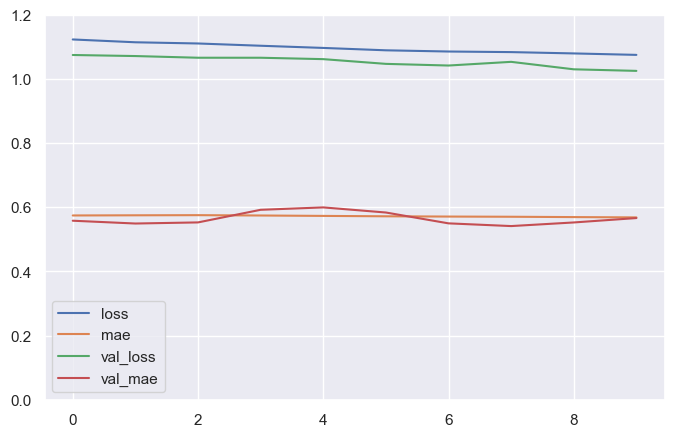

In [149]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1.20)
plt.show()

Once we are satisfied with the model's validation accuracy  or loss, we should evaluate it on the test set to estimate the generalization error before we deploy the model to production. We can do it easily by calling the evaluate() method. 

In [150]:
model.evaluate(x_test,y_test)

1575/1575 [==============================] - 8s 5ms/step - loss: 1.0785 - mae: 0.5691


[1.0785380601882935, 0.5690980553627014]

We can also plot the results to see how good they are.

1575/1575 [==============================] - 9s 5ms/step


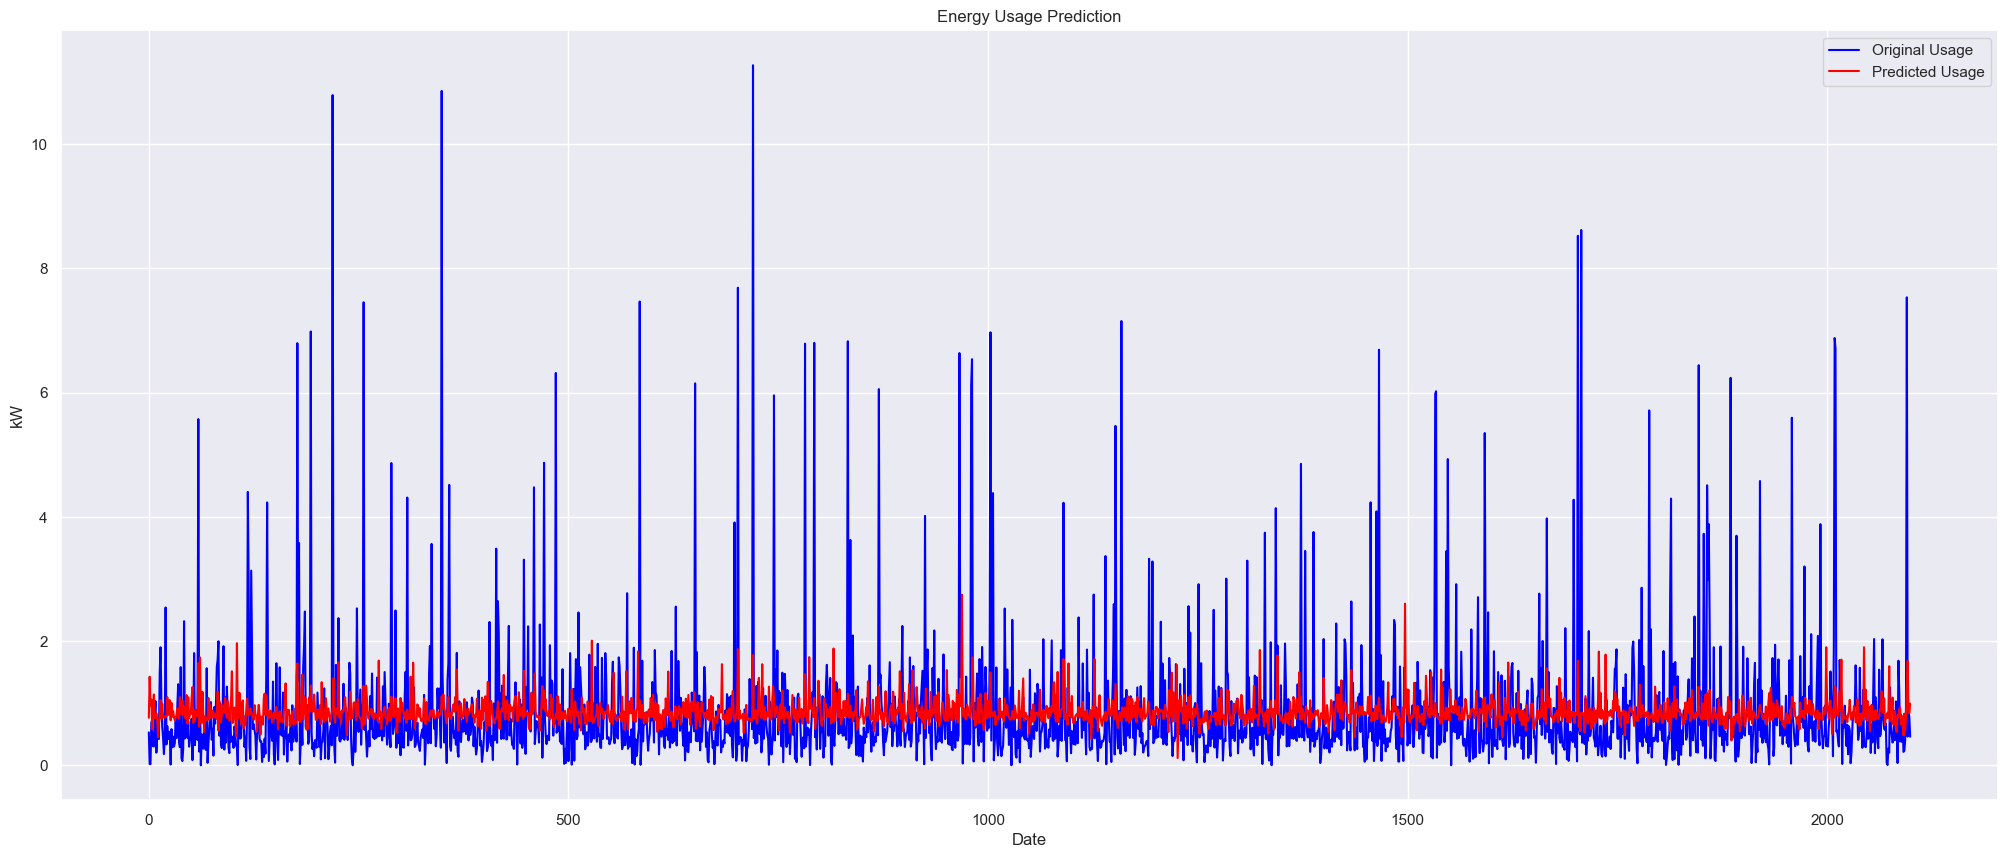

In [151]:
predictions = model.predict(x_test)
plt.figure(figsize=(25,10))
plt.plot(y_test.values[::24], color='blue', label='Original Usage')
plt.plot(predictions[:,0][::24] , color='red', label='Predicted Usage')
plt.title('Energy Usage Prediction')
plt.xlabel('Date')
plt.ylabel('kW')
plt.legend()
plt.show()

 ## 6. Exercise 2: Building a deep learning model (neural network) with keras <a name="6"> 

### 6.1 Following the steps in section 5, visit the Keras API and select an architecture for your neural network (e.g. a CNN is known to yield good results when working with time series). Build, train and validate your model. <a name="6.1"> 

### 6.1.1 Imports

To be able to run task 6 without running all of the previous cells in the notebook import the required stuff for task 6.

#### 6.1.1.1 Import Tensorflow

In [152]:
import tensorflow as tf
print(tf.__version__)

2.15.0


#### 6.1.1.2 Import Keras and auxiliary libraries

In [153]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.metrics import confusion_matrix

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import optimizers

### 6.1.2 Loading Data

First lets read in the csv data like before

In [154]:
def load_smarthome_data(data='Smart_Home_Dataset.csv'):
    dataset = pd.read_csv(data)
    print("Number of instances: {}".format(dataset.shape[0])) ##Displays the number of instances of the dataset
    print("Number of columns: {}".format(dataset.shape[1])) ##Displays the number of columns of the dataset
    return dataset

Load data and show the first 5 rows

In [155]:
smarthome = load_smarthome_data()
print("First five rows: ")
smarthome.head(5)

Number of instances: 503911
Number of columns: 32
First five rows: 


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


Then lets remove the `NaN` values like shown in section 3.1.2

In [157]:
smarthome_cleaned = smarthome.dropna()
smarthome_cleaned.isnull().sum()

time                   0
use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Garage door [kW]       0
Kitchen 12 [kW]        0
Kitchen 14 [kW]        0
Kitchen 38 [kW]        0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         0
Living room [kW]       0
Solar [kW]             0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

Again convert the time stamps to readable dates like shown in section 3.1.3

In [158]:
time_min = pd.date_range('2016-01-01 06:00 AM', periods=len(smarthome_cleaned),  freq='min')
smarthome_iot = smarthome_cleaned.set_index(time_min.strftime('%Y-%m-%d %H:%M:%S %p'))
smarthome_iot['Time'] = time_min
smarthome_iot = smarthome_iot.drop(['time'], axis=1)
smarthome_iot['Day'] = pd.Series([date.day for date in smarthome_iot['Time']],index=time_min.strftime('%Y-%m-%d %H:%M:%S %p'))
smarthome_iot['Month'] = pd.Series([date.strftime("%B") for date in smarthome_iot['Time']],index=time_min.strftime('%Y-%m-%d %H:%M:%S %p'))

### 6.1.3 Split up the data

First split the data into x and y

In [160]:
x = smarthome_iot[['temperature','humidity', 'visibility','windSpeed', 'pressure', 'windBearing', 'precipIntensity','precipProbability']]
y = smarthome_iot['House overall [kW]']

Then split the data into train and test data

In [161]:
train_ratio       = 0.75
validation_ratio  = 0.15
test_ratio        = 0.10

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)

In [163]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

Reshape the data to fit the model and print the shape of the data to see if it fits

In [177]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_val = np.reshape(x_val, (x_val.shape[0], x_test.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

print('x_train shape:\t', x_train.shape)
print('x_val shape:\t', x_val.shape)
print('x_test shape:\t', x_test.shape)

y_train = np.reshape(y_train, (y_train.shape[0], 1))
y_val = np.reshape(y_val, (y_val.shape[0], 1))
y_test = np.reshape(y_test, (y_test.shape[0], 1))

print('y_train shape:\t', y_train.shape)
print('y_val shape:\t', y_val.shape)
print('y_test shape:\t', y_test.shape)


x_train shape:	 (377932, 8, 1)
x_val shape:	 (75586, 8, 1)
x_test shape:	 (50392, 8, 1)
y_train shape:	 (377932, 1)
y_val shape:	 (75586, 1)
y_test shape:	 (50392, 1)


### 6.1.4 Build the model

In [179]:
model = Sequential()
model.add(LSTM(units=32, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=32))
model.add(Dense(units = 1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 8, 32)             4352      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12705 (49.63 KB)
Trainable params: 12705 (49.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 6.1.5 Train the model

Compile model and initialize weights

In [181]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae'])

summarize model along with number of model weights

In [182]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 8, 32)             4352      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12705 (49.63 KB)
Trainable params: 12705 (49.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now lets train the model

In [184]:
history = model.fit(x_train, y_train, 
                    epochs = 10, batch_size = 264,
                    verbose=2, 
                    validation_data=(x_val,y_val))

Epoch 1/10


1432/1432 - 31s - loss: 1.1160 - mae: 0.5735 - val_loss: 1.1425 - val_mae: 0.5780 - 31s/epoch - 21ms/step
Epoch 2/10
1432/1432 - 26s - loss: 1.1082 - mae: 0.5730 - val_loss: 1.1422 - val_mae: 0.5537 - 26s/epoch - 18ms/step
Epoch 3/10
1432/1432 - 23s - loss: 1.0996 - mae: 0.5742 - val_loss: 1.1234 - val_mae: 0.5697 - 23s/epoch - 16ms/step
Epoch 4/10
1432/1432 - 24s - loss: 1.0925 - mae: 0.5732 - val_loss: 1.1231 - val_mae: 0.5804 - 24s/epoch - 17ms/step
Epoch 5/10
1432/1432 - 40s - loss: 1.0872 - mae: 0.5720 - val_loss: 1.1300 - val_mae: 0.5719 - 40s/epoch - 28ms/step
Epoch 6/10
1432/1432 - 48s - loss: 1.0867 - mae: 0.5717 - val_loss: 1.1065 - val_mae: 0.5719 - 48s/epoch - 34ms/step
Epoch 7/10
1432/1432 - 47s - loss: 1.0790 - mae: 0.5699 - val_loss: 1.1064 - val_mae: 0.5788 - 47s/epoch - 33ms/step
Epoch 8/10
1432/1432 - 46s - loss: 1.0735 - mae: 0.5687 - val_loss: 1.0990 - val_mae: 0.5671 - 46s/epoch - 32ms/step
Epoch 9/10
1432/1432 - 49s - loss: 1.0676 - mae: 0.5674 - val_loss: 1.0895 

### 6.1.6 Evaluate the model: Accuracy and Loss Diagram

To evaluate the performance of the network we will plot the accuracy and loss diagram. The accuracy is the percentage of correctly classified images and the loss is the error of the network. The loss should decrease over time and the accuracy should increase.


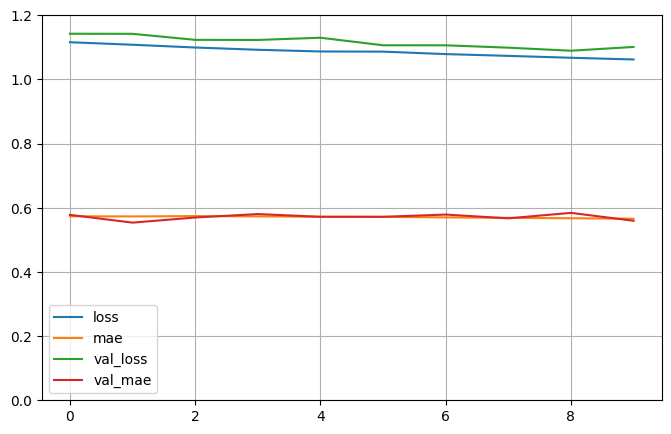

In [188]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1.20)
plt.show()

1575/1575 [==============================] - 8s 4ms/step


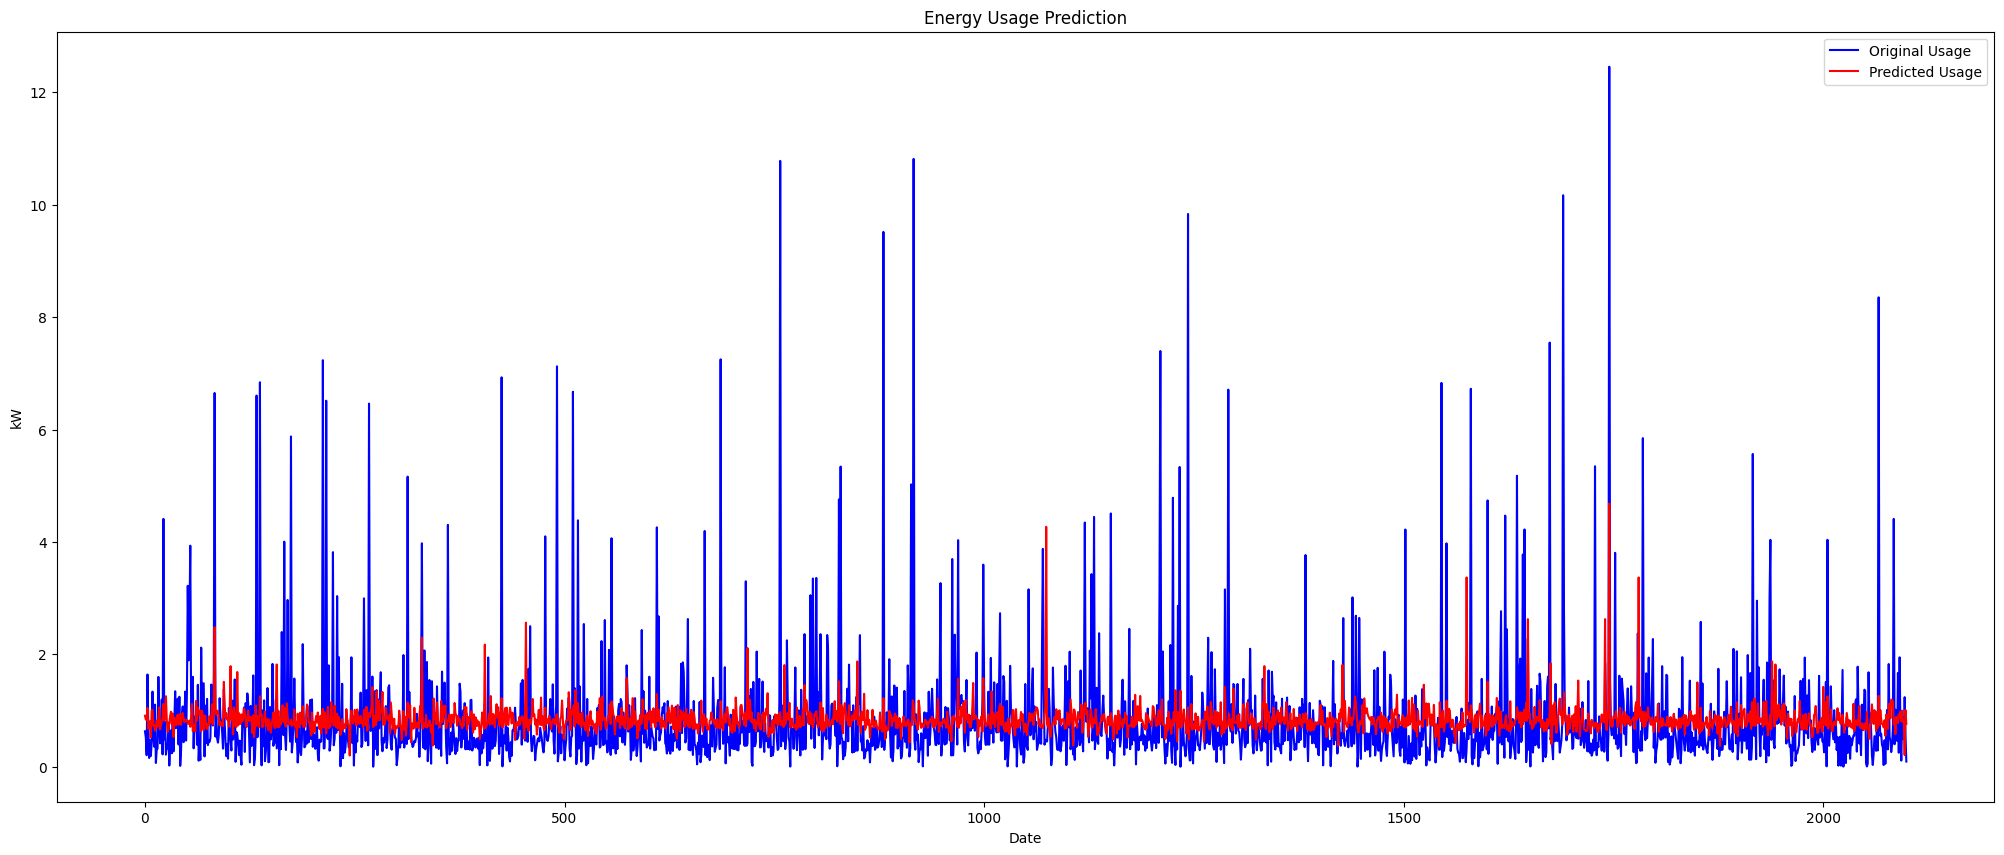

In [186]:
predictions = model.predict(x_test)
plt.figure(figsize=(25,10))
plt.plot(y_test[::24], color='blue', label='Original Usage')
plt.plot(predictions[:,0][::24] , color='red', label='Predicted Usage')
plt.title('Energy Usage Prediction')
plt.xlabel('Date')
plt.ylabel('kW')
plt.legend()
plt.show()